# XGB Final

##  Import Libraries and Dataset

In [ ]:
import ast
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier, plot_importance
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import (train_test_split, cross_val_score, GridSearchCV,
                                     StratifiedKFold, cross_validate)
from sklearn.metrics import (balanced_accuracy_score, roc_auc_score, make_scorer,
                             confusion_matrix, classification_report, accuracy_score)
from sklearn.feature_selection import RFE, RFECV
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImPipeline
from sklearn.pipeline import Pipeline

### Loading the data

In [2]:
df = pd.read_csv("C:/Users/micha/Desktop/FinalProject/allclimbs1repeatormore.csv")
difficulties_df = pd.read_csv("C:/Users/micha/Desktop/FinalProject/updatedfeatures.csv")
df

,problem_id,url,start,mid,end,grade,user_grade,is_benchmark,repeats,problem_type,is_master,setter_id,setter_nickname,setter_firstname,setter_lastname,setter_city,setter_country,setter_profile_image_url,setter_can_share_data
0,367892,https://moonboard.com/Problems/View/367892/cat...,"[[0, 4], [3, 5]]","[[4, 8], [0, 8], [2, 12], [3, 14]]","[[0, 17]]",6C,NaN,False,1,NaN,False,711F5068-4D73-451C-B228-8113EDFFC8DA,greg orlov,greg,orlov,seattle,USA,/Content/Account/Images/default-profile.png?63...,True
1,367885,https://moonboard.com/Problems/View/367885/gulag,"[[0, 4]]","[[1, 7], [3, 11], [5, 13]]","[[8, 17]]",7A,NaN,False,1,NaN,False,05f91964-f58c-4a49-af50-abec02f71300,micklevin,Mick,Levin,Halifax,Canada,/Content/Account/Users/Profile/05f91964-f58c-4...,True
2,367880,https://moonboard.com/Problems/View/367880/sma...,"[[5, 4], [8, 3]]","[[7, 7], [7, 9], [7, 12], [4, 14]]","[[6, 17]]",6B+,NaN,False,1,NaN,False,6e042086-23d3-4273-99ff-03728a652da2,Dawn Brown,Dawn,Brown,Doncaster,United Kingdom,/Content/Account/Users/Profile/6e042086-23d3-4...,True
3,367874,https://moonboard.com/Problems/View/367874/min...,"[[5, 4]]","[[4, 7], [1, 10], [4, 12], [6, 12], [6, 16]]","[[6, 17]]",6B+,NaN,False,4,NaN,False,5c761f92-1b96-445e-ac6b-722386289008,castordu,Céline,Chambon,Saint Martin d'Hères,France,/Content/Account/Images/default-profile.png?63...,True
4,367871,https://moonboard.com/Problems/View/367871/la-...,"[[5, 4]]","[[3, 16], [6, 12], [6, 10]]","[[2, 17]]",7A,NaN,False,1,NaN,False,3c4dd719-de25-44e7-9472-768dc3b9121f,Leftandright,Nacho,Antor,Sabadell,Spain,/Content/Account/Images/default-profile.png?63...,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25112,19223,https://moonboard.com/Problems/View/19223/prob...,"[[9, 4]]","[[7, 7], [2, 9], [4, 12], [1, 15]]","[[6, 17]]",7A+,7A+,True,1207,NaN,False,CC7D7BD1-67CD-4027-A537-22E7855C18B7,Ally Patrick,Alistair,Patrick,Manchester,United Kingdom,/Content/Account/Images/default-profile.png?63...,True
25113,19222,https://moonboard.com/Problems/View/19222/vurt,"[[1, 2]]","[[4, 6], [2, 9], [5, 11], [6, 13]]","[[8, 17]]",7B,7B,True,672,NaN,False,5FC09F63-05F3-4DAE-A1A5-3AC22C37139A,Ben Moon,Ben,Moon,Sheffield,United Kingdom,/Content/Account/Users/Profile/5FC09F63-05F3-4...,True
25114,19221,https://moonboard.com/Problems/View/19221/shor...,"[[3, 2], [1, 3]]","[[2, 6], [5, 8], [2, 11], [3, 12], [0, 15]]","[[2, 17]]",6C+,6C+,False,307,NaN,False,CC7D7BD1-67CD-4027-A537-22E7855C18B7,Ally Patrick,Alistair,Patrick,Manchester,United Kingdom,/Content/Account/Images/default-profile.png?63...,True
25115,19220,https://moonboard.com/Problems/View/19220/crim...,"[[3, 2]]","[[3, 5], [5, 8], [8, 11], [3, 12], [3, 15]]","[[2, 17]]",7B,7B,False,224,NaN,False,5FC09F63-05F3-4DAE-A1A5-3AC22C37139A,Ben Moon,Ben,Moon,Sheffield,United Kingdom,/Content/Account/Users/Profile/5FC09F63-05F3-4...,True


## Data Exploration and Preprocessing

### Removing redundunt coluns

In [3]:
desired_columns = ['start', 'mid', 'end', 'grade']
df = df[desired_columns]
df

,start,mid,end,grade
0,"[[0, 4], [3, 5]]","[[4, 8], [0, 8], [2, 12], [3, 14]]","[[0, 17]]",6C
1,"[[0, 4]]","[[1, 7], [3, 11], [5, 13]]","[[8, 17]]",7A
2,"[[5, 4], [8, 3]]","[[7, 7], [7, 9], [7, 12], [4, 14]]","[[6, 17]]",6B+
3,"[[5, 4]]","[[4, 7], [1, 10], [4, 12], [6, 12], [6, 16]]","[[6, 17]]",6B+
4,"[[5, 4]]","[[3, 16], [6, 12], [6, 10]]","[[2, 17]]",7A
...,...,...,...,...
25112,"[[9, 4]]","[[7, 7], [2, 9], [4, 12], [1, 15]]","[[6, 17]]",7A+
25113,"[[1, 2]]","[[4, 6], [2, 9], [5, 11], [6, 13]]","[[8, 17]]",7B
25114,"[[3, 2], [1, 3]]","[[2, 6], [5, 8], [2, 11], [3, 12], [0, 15]]","[[2, 17]]",6C+
25115,"[[3, 2]]","[[3, 5], [5, 8], [8, 11], [3, 12], [3, 15]]","[[2, 17]]",7B


### Checking for null values

In [4]:
print(df[['start', 'mid', 'end', 'grade']].isnull().sum())

start    0
mid      0
end      0
grade    0
dtype: int64


### Checking data types of the columns

In [5]:
print(df[['start', 'mid', 'end', 'grade']].dtypes)

start    object
mid      object
end      object
grade    object
dtype: object


### Creating functions to preprocess the data 

1) Making a new hold sequence column that has the coordinate values as integers of all the holds in the sequence and applying a simple calculation to correct obvious errors in the order the holds appear in the sequence, always assuming the next hold is the closest hold

In [6]:
from ast import literal_eval

def custom_sort_with_new_condition(coordinates):
    # Sort the coordinates based on the y value
    sorted_by_y = sorted(coordinates, key=lambda x: x[1])

    # Special case for the first two elements if they have the same y value
    if len(sorted_by_y) > 2 and sorted_by_y[0][1] == sorted_by_y[1][1]:
        third_x = sorted_by_y[2][0]
        sorted_by_y[:2] = sorted(sorted_by_y[:2], key=lambda x: abs(x[0] - third_x))

    # Then, sort by the x value proximity for those with the same y value
    i = 1  # Start from the second element as the first two are already sorted if needed
    while i < len(sorted_by_y) - 1:
        start_i = i
        while i < len(sorted_by_y) - 1 and sorted_by_y[i][1] == sorted_by_y[i + 1][1]:
            i += 1

        # Sort by proximity to the previous x value for items with the same y value
        if i > start_i:
            previous_x = sorted_by_y[start_i - 1][0]
            sorted_by_y[start_i:i + 1] = sorted(sorted_by_y[start_i:i + 1], key=lambda x: abs(x[0] - previous_x))

        i += 1

    return sorted_by_y

# Apply literal_eval to convert string representations of lists into actual lists
df['start'] = df['start'].apply(literal_eval)
df['mid'] = df['mid'].apply(literal_eval)
df['end'] = df['end'].apply(literal_eval)

# Combine 'start', 'mid', and 'end' into 'sorted_combined' and apply custom sorting
df['sorted_combined'] = df.apply(lambda row: custom_sort_with_new_condition(row['start'] + row['mid'] + row['end']), axis=1)

df


C:\Users\micha\AppData\Local\Temp\ipykernel_12988\29862686.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['start'] = df['start'].apply(literal_eval)
C:\Users\micha\AppData\Local\Temp\ipykernel_12988\29862686.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mid'] = df['mid'].apply(literal_eval)
C:\Users\micha\AppData\Local\Temp\ipykernel_12988\29862686.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

,start,mid,end,grade,sorted_combined
0,"[[0, 4], [3, 5]]","[[4, 8], [0, 8], [2, 12], [3, 14]]","[[0, 17]]",6C,"[[0, 4], [3, 5], [4, 8], [0, 8], [2, 12], [3, ..."
1,"[[0, 4]]","[[1, 7], [3, 11], [5, 13]]","[[8, 17]]",7A,"[[0, 4], [1, 7], [3, 11], [5, 13], [8, 17]]"
2,"[[5, 4], [8, 3]]","[[7, 7], [7, 9], [7, 12], [4, 14]]","[[6, 17]]",6B+,"[[8, 3], [5, 4], [7, 7], [7, 9], [7, 12], [4, ..."
3,"[[5, 4]]","[[4, 7], [1, 10], [4, 12], [6, 12], [6, 16]]","[[6, 17]]",6B+,"[[5, 4], [4, 7], [1, 10], [4, 12], [6, 12], [6..."
4,"[[5, 4]]","[[3, 16], [6, 12], [6, 10]]","[[2, 17]]",7A,"[[5, 4], [6, 10], [6, 12], [3, 16], [2, 17]]"
...,...,...,...,...,...
25112,"[[9, 4]]","[[7, 7], [2, 9], [4, 12], [1, 15]]","[[6, 17]]",7A+,"[[9, 4], [7, 7], [2, 9], [4, 12], [1, 15], [6,..."
25113,"[[1, 2]]","[[4, 6], [2, 9], [5, 11], [6, 13]]","[[8, 17]]",7B,"[[1, 2], [4, 6], [2, 9], [5, 11], [6, 13], [8,..."
25114,"[[3, 2], [1, 3]]","[[2, 6], [5, 8], [2, 11], [3, 12], [0, 15]]","[[2, 17]]",6C+,"[[3, 2], [1, 3], [2, 6], [5, 8], [2, 11], [3, ..."
25115,"[[3, 2]]","[[3, 5], [5, 8], [8, 11], [3, 12], [3, 15]]","[[2, 17]]",7B,"[[3, 2], [3, 5], [5, 8], [8, 11], [3, 12], [3,..."


In order to simulate a climber's route, the function custom_sort_with_new_condition arranges climb coordinates first by vertical (y) and then by horizontal (x) locations. List objects are created from stringified lists in dataframe columns using the literal_eval method. The real climbing sequence is reflected in the sorting of the 'combined' column, which is created by consolidating the climbing paths. After sorting, the original 'mixed' column is removed, which improves the data for analysis and machine learning feature building.

In [7]:
def create_difficulty_matrix(df, difficulties_df):
    # Create a mapping from (X, Y) coordinates to difficulty values
    hold_difficulties = {(row.X_coord, row.Y_coord): row.Difficulties for row in difficulties_df.itertuples()}
    
    # Generate sorted coordinates based on the mapping and create the coord_to_index mapping
    sorted_coords = sorted(hold_difficulties)
    coord_to_index = {coord: index for index, coord in enumerate(sorted_coords)}

    # Initialize the difficulty matrix
    difficulty_matrix = np.zeros((len(df), len(coord_to_index)))
    
    # Fill in the difficulty matrix
    for index, row in df.iterrows():
        all_holds = row['sorted_combined']
        for hold in all_holds:
            hold_tuple = tuple(hold)
            if hold_tuple in hold_difficulties:
                position_index = coord_to_index[hold_tuple]
                difficulty_matrix[index, position_index] = hold_difficulties[hold_tuple]
                
    return difficulty_matrix, coord_to_index

In [8]:
difficulty_matrix, coord_to_index = create_difficulty_matrix(df, difficulties_df)

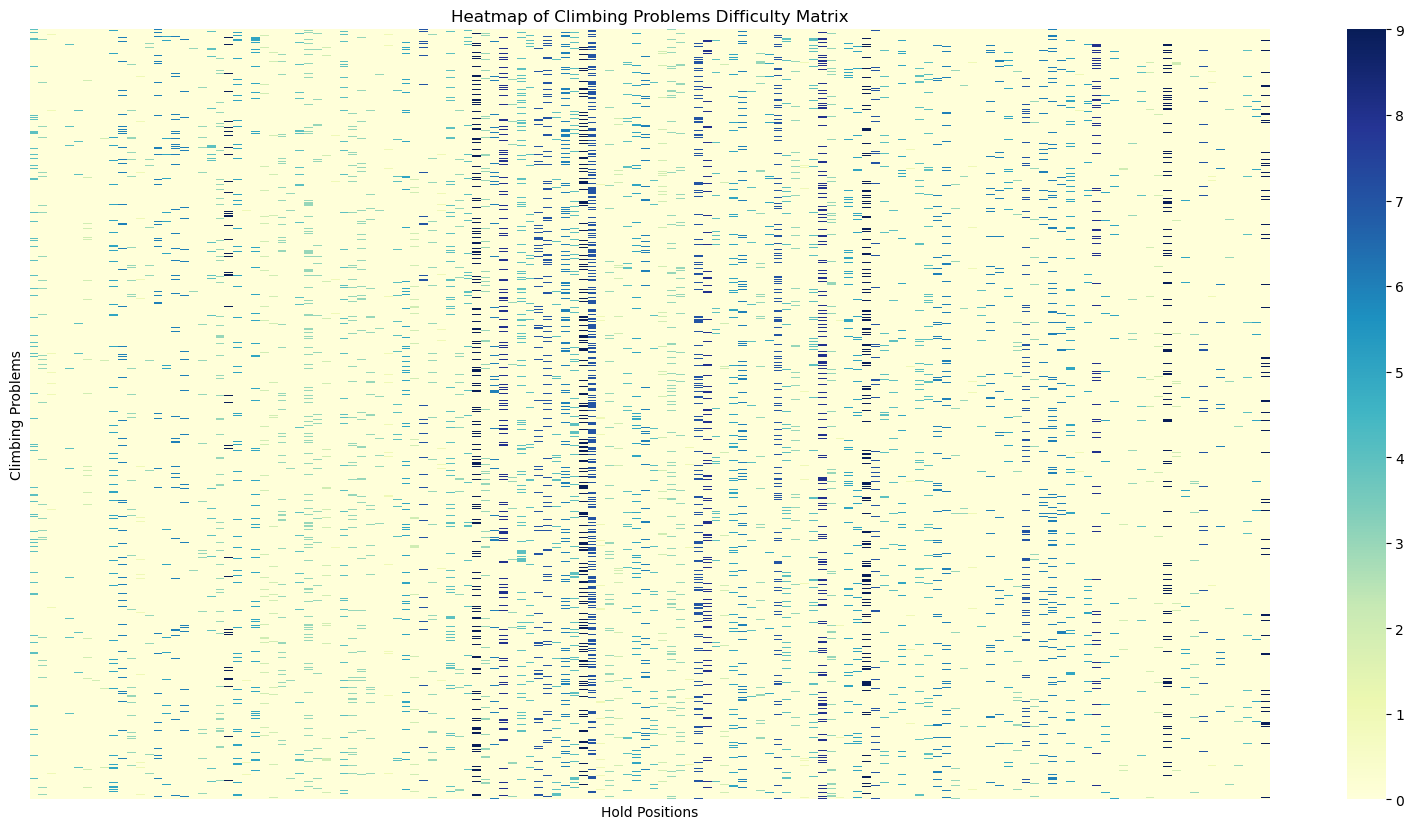

In [9]:
# Create a heatmap
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
sns.heatmap(difficulty_matrix, cmap="YlGnBu", cbar=True, xticklabels=False, yticklabels=False)
plt.title('Heatmap of Climbing Problems Difficulty Matrix')
plt.xlabel('Hold Positions')
plt.ylabel('Climbing Problems')
plt.show()

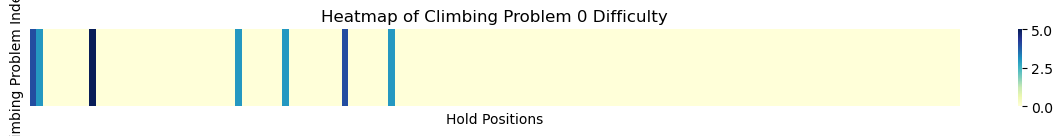

In [10]:
climbing_problem_index = 0

# Extract the difficulty array for the selected climbing problem
single_climbing_problem_difficulty = difficulty_matrix[climbing_problem_index, :].reshape(1, -1)

# Create a heatmap for the single climbing problem's difficulty array
plt.figure(figsize=(15, 1))  # Adjust the figure size as needed
sns.heatmap(single_climbing_problem_difficulty, cmap="YlGnBu", cbar=True, xticklabels=False, yticklabels=False)
plt.title(f'Heatmap of Climbing Problem {climbing_problem_index} Difficulty')
plt.xlabel('Hold Positions')
plt.ylabel('Climbing Problem Index')
plt.show()

In summary, this code visualizes the climbing problem difficulty data in a way that helps to quickly grasp the overall distribution of difficulty across the holds and problems, identifying patterns such as which areas of the wall are consistently more difficult.

### Define the calculate_aggregated_difficulties function

In [11]:
def calculate_aggregated_difficulties(difficulty_matrix):
    # Calculate the average difficulty for each problem (row), ignoring zero values
    avg_difficulties = np.nanmean(np.where(difficulty_matrix == 0, np.nan, difficulty_matrix), axis=1)
    
    # Calculate the maximum difficulty for each problem
    max_difficulties = np.max(difficulty_matrix, axis=1)
    
    # Calculate the minimum difficulty for each problem, excluding zeros
    min_difficulties = np.min(np.where(difficulty_matrix != 0, difficulty_matrix, np.inf), axis=1)
    
    # Replace inf with np.nan for the min_difficulties if there are all zero values in a row
    min_difficulties = np.where(min_difficulties == np.inf, np.nan, min_difficulties)
    
    return avg_difficulties, max_difficulties, min_difficulties

In this revised function:

avg_difficulties calculates the mean difficulty per problem, reflecting the overall challenge of the problem.
max_difficulties finds the highest difficulty value per problem, indicating the hardest move in each problem.
min_difficulties initially sets the difficulty to np.inf where the difficulty is 0 (to ignore these when calculating the minimum), then calculates the minimum value per problem, and finally replaces np.inf with 0 (or np.nan) to handle rows where all values are zero, indicating no difficulty or unattempted holds.
This function now efficiently computes the aggregate statistics for each climbing problem, with consideration for rows that could be entirely zero, which could be relevant in datasets representing climbing problems with varying numbers of holds used

### Calculate the aggregated difficulties

In [12]:
avg_difficulties, max_difficulties, min_difficulties = calculate_aggregated_difficulties(difficulty_matrix)

### Visualization of Average Difficulties

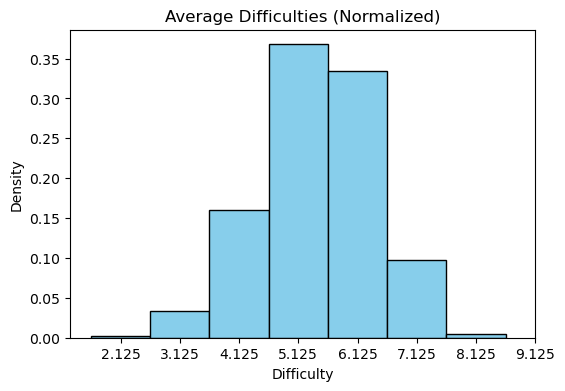

In [13]:
# Define bins for the histogram
avg_difficulty_bins = np.arange(min(avg_difficulties)-0.5, max(avg_difficulties)+1, 1)

# Plot the histogram for average difficulties
plt.figure(figsize=(6, 4))
plt.hist(avg_difficulties, bins=avg_difficulty_bins, color='skyblue', edgecolor='black', density=True)
plt.title('Average Difficulties (Normalized)')
plt.xlabel('Difficulty')
plt.ylabel('Density')
plt.xticks(np.arange(min(avg_difficulties), max(avg_difficulties)+1, 1))
plt.show()

### Visualization of Maximum Difficulties

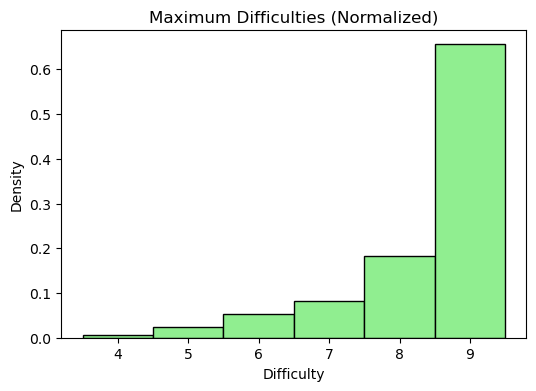

In [14]:
# Define bins for the histogram
max_difficulty_bins = np.arange(min(max_difficulties)-0.5, max(max_difficulties)+1, 1)

# Plot the histogram for maximum difficulties
plt.figure(figsize=(6, 4))
plt.hist(max_difficulties, bins=max_difficulty_bins, color='lightgreen', edgecolor='black', density=True)
plt.title('Maximum Difficulties (Normalized)')
plt.xlabel('Difficulty')
plt.ylabel('Density')
plt.xticks(np.arange(min(max_difficulties), max(max_difficulties)+1, 1))
plt.show()

### Visualization of Non-Zero Minimum Difficulties

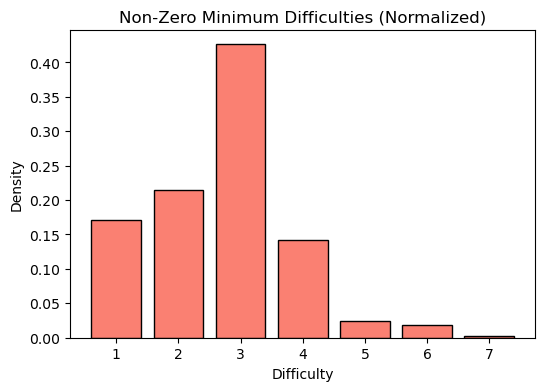

In [15]:
# Filter out zero and infinite values from min_difficulties
valid_min_difficulties = min_difficulties[(min_difficulties > 0) & (min_difficulties != np.inf)]

# Check if there are any non-zero minimum difficulties to plot
if valid_min_difficulties.size > 0:
    # Define bins for the histogram
    min_difficulty_bins = np.arange(min(valid_min_difficulties)-0.5, max(valid_min_difficulties)+1, 1)

    # Plot the histogram for non-zero minimum difficulties
    plt.figure(figsize=(6, 4))
    plt.hist(valid_min_difficulties, bins=min_difficulty_bins, color='salmon', edgecolor='black', density=True, rwidth=0.8)
    plt.title('Non-Zero Minimum Difficulties (Normalized)')
    plt.xlabel('Difficulty')
    plt.ylabel('Density')
    plt.xticks(np.arange(min(valid_min_difficulties), max(valid_min_difficulties)+1, 1))
    plt.show()
else:
    print("No non-zero minimum difficulties found. Check the calculation or data.")

Dominant Difficulty: The most common minimum difficulty level among the climbing problems is 3. A significant majority of problems have at least one hold with this difficulty level, which might suggest that difficulty 3 is a baseline challenge in these climbing routes.

Distribution Shape: The distribution of minimum difficulties is not uniform. Difficulty levels 1 and 6 are the least common, which may indicate that very easy (level 1) and very hard (level 6) holds are rarely the minimum difficulty in a problem. This might be because most routes are designed to be above a certain base difficulty and below a certain maximum difficulty for safety or targeting specific skill levels.

Potential Climber Progression Path: The concentration of minimum difficulties at level 2 and 3 suggests a progression path for novice climbers, offering a set of problems that increase in challenge without a steep jump in difficulty.

Gap at Difficulty Level 5: There's a noticeable gap at difficulty level 5, with a significantly lower number of problems than the neighboring difficulties (4 and 6). This could point to a preference in route setting patterns, or it might indicate that level 5 holds are less common or less frequently the minimum difficulty on these problems.

Difficulty Level 6 Presence: Despite being less common, the presence of difficulty level 6 holds as the minimum for some problems indicates that there are a few routes that are quite challenging right from the start. These problems might be intended for advanced climbers who are looking for a tough challenge.

Implications for Route Setting: If this dataset informs route setting, there may be an opportunity to create more problems with a minimum difficulty of levels 1, 5, and 6 to provide a wider range of challenges and possibly better cater to beginners and advanced climbers.

Considerations for Training Programs: Climbing gyms or trainers could use this data to structure climbing programs, starting novices on problems with minimum difficulties at levels 1 or 2 and gradually moving them up to tackle problems with higher minimum difficulties.

Overall, the histogram reveals a climbing problem set with a good range of difficulties, albeit with a significant concentration in the lower-middle range of difficulty. This may reflect the skill level of the majority target audience or the commonality of hold difficulties used in setting these problems.

### Display the difficulties DataFrame

In [16]:
difficulties_df

,X_coord,Y_coord,Difficulties,HoldType,GripOrientation
0,0,17,5,2,0
1,0,15,2,1,315
2,0,14,2,4,0
3,0,13,2,2,315
4,0,12,4,1,0
...,...,...,...,...,...
135,10,8,7,2,0
136,10,7,3,1,0
137,10,6,5,1,0
138,10,5,2,1,0


### Define the function to calculate positional features

In [17]:
def calculate_positional_features(df):
    # Calculate average position and number of holds for each problem
    avg_rows, avg_cols, num_holds = [], [], []
    for _, row in df.iterrows():
        all_holds = row['sorted_combined'] 
        rows = [hold[1] for hold in all_holds]
        cols = [hold[0] for hold in all_holds]
        avg_rows.append(np.mean(rows) if rows else 0)
        avg_cols.append(np.mean(cols) if cols else 0)
        num_holds.append(len(all_holds))
    return avg_rows, avg_cols, num_holds

### Calculate positional features from the DataFrame

In [18]:
avg_rows, avg_cols, num_holds = calculate_positional_features(df)

### Visualization - Average Column vs. Average Row

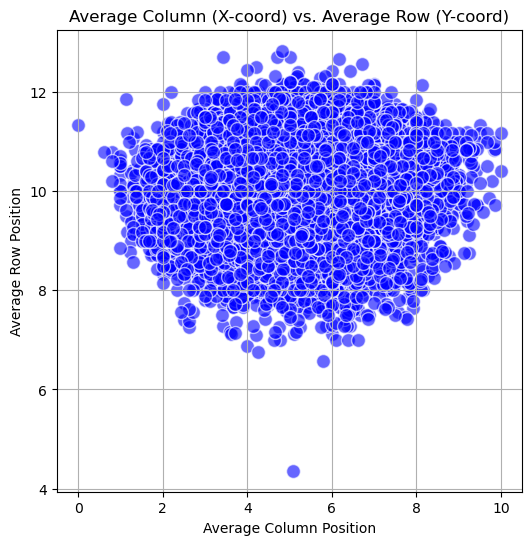

In [19]:
# Create a scatter plot for average column vs. average row positions of holds
plt.figure(figsize=(6, 6))
plt.scatter(avg_cols, avg_rows, alpha=0.6, c='blue', edgecolors='w', s=100)
plt.title('Average Column (X-coord) vs. Average Row (Y-coord)')
plt.xlabel('Average Column Position')
plt.ylabel('Average Row Position')
plt.grid(True)
plt.show()

Central Tendency: The points are concentrated around the center of the plot, suggesting that, on average, the problems use holds that are more centrally located on the climbing wall.

Spread and Variation: There's a wide spread of points in both the horizontal and vertical directions, indicating variability in the hold positions. However, there is less spread at the extremes (very top, bottom, or sides), suggesting fewer problems that are concentrated at the edges of the wall.

Prevalent Hold Positions: The density of points is greater in the middle rows (around rows 9 to 11) than in the upper or lower rows. This may indicate a preference or a natural tendency for problem setters to use holds in the middle part of the wall more often.

Column Position Variability: There appears to be a fairly even distribution of points across the average column positions, implying that problems are not biased toward the left or right side of the climbing wall.

Outliers: Some problems have average positions that are lower (around row 7) and some that are higher (above row 11). These could represent easier problems where climbers don't need to go very high or harder problems that utilize the full height of the wall.

Potential Setting Styles: The clustering in the center might suggest a setting style that clusters difficulties in the middle section of the wall, possibly to accommodate different heights of climbers and to focus on more technical moves rather than reachy ones.

### Visualization - Number of Holds vs. Average Row

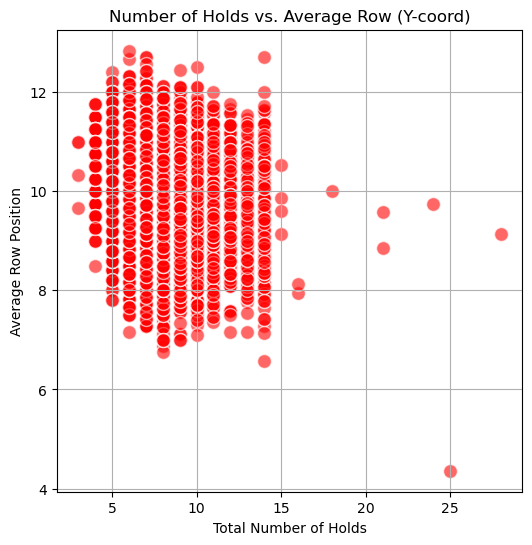

In [20]:
# Create a scatter plot for number of holds vs. average row positions of holds
plt.figure(figsize=(6, 6))
plt.scatter(num_holds, avg_rows, alpha=0.6, c='red', edgecolors='w', s=100)
plt.title('Number of Holds vs. Average Row (Y-coord)')
plt.xlabel('Total Number of Holds')
plt.ylabel('Average Row Position')
plt.grid(True)
plt.show()

Uniform Distribution Across Holds: There doesn't appear to be a strong trend or correlation between the number of holds and their average row position. This could suggest that problems with varying numbers of holds are spread fairly uniformly up and down the wall.

Concentration of Holds: There is a dense concentration of data points in the middle row positions across different numbers of holds. This indicates that most problems, regardless of the number of holds, tend to have a center of gravity in the middle of the wall vertically.

Vertical Spread: While there is a concentration around the middle, there is also a significant spread in the average row positions, especially for problems with 6 to 10 holds. This might reflect a variety in problem styles, with some problems set to be more top-heavy or bottom-heavy in their hold distribution.

Fewer Holds, Lower Variation: For problems with a smaller number of holds (4-5), there appears to be less variation in the average row position. This could be due to the limited number of holds restricting the variety of moves and therefore the vertical spread of the holds.

Outliers: Some problems with a larger number of holds show a lower average row position. These could be problems designed to be traverses or otherwise spread out horizontally rather than vertically.

Potential Clustering: Some vertical lines of data points, where the number of holds is the same but the average row position varies, suggest clustering. These could represent different sets or styles of problems that use a fixed number of holds.

Data Distribution: Most problems seem to have between 6 to 10 holds. Fewer problems have 4 or 5 holds, and even fewer have more than 10 holds.

### Number of Holds vs. Average Column

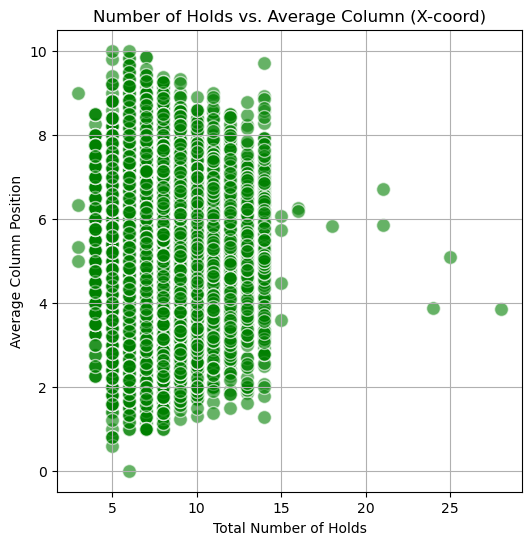

In [21]:
# Create a scatter plot for number of holds vs. average column positions of holds
plt.figure(figsize=(6, 6))
plt.scatter(num_holds, avg_cols, alpha=0.6, c='green', edgecolors='w', s=100)
plt.title('Number of Holds vs. Average Column (X-coord)')
plt.xlabel('Total Number of Holds')
plt.ylabel('Average Column Position')
plt.grid(True)
plt.show()

Horizontal Distribution: There is a wide distribution of the average column positions across different numbers of holds. This suggests a good horizontal spread of problems on the wall.

Central Concentration: Most of the average column positions, regardless of the number of holds, appear to be centered around the middle columns. This could indicate a preference for setting problems that are more balanced in their left-right placement on the wall, or it might be due to the structure of the climbing wall itself.

Column Variability: For problems with 6 to 10 holds, there's significant variability in the average column position. This variability decreases for problems with fewer than 6 holds and those with more than 10 holds. This could be due to a more uniform hold distribution for routes with fewer holds or a limitation in wall width for problems with more holds.

Uniform Hold Usage: The problems with 4 to 12 holds don't show a clear trend in the average column position changing with the number of holds. This could imply that routes are designed with an even distribution of holds from left to right, regardless of how many holds are used.

Potential Outliers: Some data points with a higher or lower average column position could indicate problems that are predominantly set to one side of the wall. These could be designed to provide a different climbing experience or to focus on specific types of movement (like lateral moves).

Route Design Implications: If the climbing wall has features such as overhangs or slabs, the distribution of column positions might be influenced by these features, with setters placing holds where they can create the most interesting or challenging problems.

Limited Edge Setting: There is a lack of problems set at the extreme edges (columns 1 and 9), which could indicate either a physical limitation of the wall or a setting preference to keep problems within a certain boundary for safety or practical reasons.

### Calculate aggregated difficulties and update DataFrame

In [22]:
# Check the lengths to ensure they match
print("Length of avg_difficulties:", len(avg_difficulties))
print("Length of df:", len(df))

if len(avg_difficulties) == len(df):
    df['avg_difficulty'] = avg_difficulties
    df['max_difficulty'] = max_difficulties
    df['min_difficulty'] = min_difficulties
    df['avg_row'] = avg_rows
    df['avg_col'] = avg_cols
    df['num_holds'] = num_holds

    # Display the DataFrame with the new features added
    print(df.head())
else:
    print("Length mismatch. Ensure you are adding columns to the correct DataFrame.")

Length of avg_difficulties: 25117
Length of df: 25117
              start                                           mid        end  \
0  [[0, 4], [3, 5]]            [[4, 8], [0, 8], [2, 12], [3, 14]]  [[0, 17]]   
1          [[0, 4]]                    [[1, 7], [3, 11], [5, 13]]  [[8, 17]]   
2  [[5, 4], [8, 3]]            [[7, 7], [7, 9], [7, 12], [4, 14]]  [[6, 17]]   
3          [[5, 4]]  [[4, 7], [1, 10], [4, 12], [6, 12], [6, 16]]  [[6, 17]]   
4          [[5, 4]]                   [[3, 16], [6, 12], [6, 10]]  [[2, 17]]   

  grade                                    sorted_combined  avg_difficulty  \
0    6C  [[0, 4], [3, 5], [4, 8], [0, 8], [2, 12], [3, ...        3.571429   
1    7A        [[0, 4], [1, 7], [3, 11], [5, 13], [8, 17]]        5.200000   
2   6B+  [[8, 3], [5, 4], [7, 7], [7, 9], [7, 12], [4, ...        6.428571   
3   6B+  [[5, 4], [4, 7], [1, 10], [4, 12], [6, 12], [6...        6.714286   
4    7A       [[5, 4], [6, 10], [6, 12], [3, 16], [2, 17]]        5.000000 

C:\Users\micha\AppData\Local\Temp\ipykernel_12988\639474838.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg_difficulty'] = avg_difficulties
C:\Users\micha\AppData\Local\Temp\ipykernel_12988\639474838.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['max_difficulty'] = max_difficulties
C:\Users\micha\AppData\Local\Temp\ipykernel_12988\639474838.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

# ATTEMPTING TO ADD SOME FEATURES

### Hold Difficulty Gradient

In [23]:
def calculate_difficulty_gradient(df, difficulties_df):
    # Create a mapping from (X, Y) coordinates to difficulty values
    hold_difficulties = {(row.X_coord, row.Y_coord): row.Difficulties for row in difficulties_df.itertuples()}
    
    # Initialize a list to store the difficulty gradient for each problem
    difficulty_gradients = []
    
    for index, row in df.iterrows():
        all_holds = row['sorted_combined']
        problem_gradients = []
        
        # Calculate the difficulty gradient between consecutive holds
        for i in range(1, len(all_holds)):
            current_hold = tuple(all_holds[i])
            previous_hold = tuple(all_holds[i-1])
            if current_hold in hold_difficulties and previous_hold in hold_difficulties:
                # Get the absolute difference in difficulties between holds
                gradient = abs(hold_difficulties[current_hold] - hold_difficulties[previous_hold])
                problem_gradients.append(gradient)
        
        # Take the average of gradients for the problem, or 0 if there's only one hold
        avg_gradient = np.mean(problem_gradients) if problem_gradients else 0
        difficulty_gradients.append(avg_gradient)
        
    # Add the difficulty gradient as a new column to the DataFrame
    df['difficulty_gradient'] = difficulty_gradients

In [24]:
# Call the function to calculate difficulty gradients
calculate_difficulty_gradient(df, difficulties_df)

C:\Users\micha\AppData\Local\Temp\ipykernel_12988\2908414331.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['difficulty_gradient'] = difficulty_gradients


### Movement Complexity

In [25]:
def calculate_movement_complexity(df):
    # Initialize a list to store the movement complexity for each problem
    movement_complexity_scores = []
    
    for index, row in df.iterrows():
        all_holds = row['sorted_combined']
        complexities = []
        
        # Calculate the movement complexity based on distances and angles
        for i in range(1, len(all_holds)):
            # Compute Euclidean distance between consecutive holds
            distance = np.linalg.norm(np.array(all_holds[i]) - np.array(all_holds[i-1]))
            complexities.append(distance)
        
        # The complexity score could be the standard deviation of distances,
        # which reflects the diversity in movement types
        complexity_score = np.std(complexities) if complexities else 0
        movement_complexity_scores.append(complexity_score)
        
    # Add the movement complexity score as a new column to the DataFrame
    df['movement_complexity'] = movement_complexity_scores

In [26]:
calculate_movement_complexity(df)

C:\Users\micha\AppData\Local\Temp\ipykernel_12988\1914089574.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['movement_complexity'] = movement_complexity_scores


### Vertical Progression

In [27]:
def calculate_vertical_progression(df):
    # Initialize a list to store the vertical progression rate for each problem
    vertical_progression_rates = []
    
    for index, row in df.iterrows():
        all_holds = row['sorted_combined']
        vertical_moves = []
        
        # Calculate the vertical progression by looking at the y-coordinate differences
        for i in range(1, len(all_holds)):
            vertical_move = all_holds[i][1] - all_holds[i-1][1]
            vertical_moves.append(vertical_move)
        
        # Calculate the rate of vertical progression as the sum of all vertical moves
        # A higher sum would indicate a problem that gains height more quickly
        vertical_progression_rate = np.sum(vertical_moves)
        vertical_progression_rates.append(vertical_progression_rate)
        
    # Add the vertical progression rate as a new column to the DataFrame
    df['vertical_progression'] = vertical_progression_rates

In [28]:
# Call the function to calculate vertical progression
calculate_vertical_progression(df)

C:\Users\micha\AppData\Local\Temp\ipykernel_12988\2352110225.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vertical_progression'] = vertical_progression_rates


### Hold density

In [29]:
# Calculate the density of holds within a certain radius
def calculate_hold_density(sorted_combined, radius=1):
    hold_density = []
    for holds in sorted_combined:
        density = []
        for hold in holds:
            # Calculate the number of holds within the defined radius
            count = sum(1 for other_hold in holds if np.linalg.norm(np.array(hold) - np.array(other_hold)) <= radius)
            density.append(count)
        # Average density per hold for the problem
        hold_density.append(np.mean(density))
    return hold_density

In [30]:
# Adding the hold_density feature to the dataframe 'df'
df['hold_density'] = calculate_hold_density(df['sorted_combined'])

C:\Users\micha\AppData\Local\Temp\ipykernel_12988\1244904969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hold_density'] = calculate_hold_density(df['sorted_combined'])


### Route Sequence Difficulty

In [31]:
# Calculate the sequence difficulty based on the sorted_combined holds
def calculate_sequence_difficulty(sorted_combined, hold_difficulties):
    sequence_difficulty = []
    for holds in sorted_combined:
        difficulties = [hold_difficulties.get(tuple(hold), 0) for hold in holds]
        sequence_difficulty.append(np.mean(difficulties))
    return sequence_difficulty

# Create a dictionary from the hold_difficulties DataFrame for fast lookup
hold_difficulties_dict = {(x, y): difficulty for x, y, difficulty in zip(difficulties_df['X_coord'], difficulties_df['Y_coord'], difficulties_df['Difficulties'])}

# Adding the route_sequence_difficulty feature to the dataframe 'df'
df['route_sequence_difficulty'] = calculate_sequence_difficulty(df['sorted_combined'], hold_difficulties_dict)

C:\Users\micha\AppData\Local\Temp\ipykernel_12988\3241342594.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['route_sequence_difficulty'] = calculate_sequence_difficulty(df['sorted_combined'], hold_difficulties_dict)


### Reach index

In [32]:
# Calculate the average reach required between holds
def calculate_reach_index(sorted_combined):
    reach_indexes = []
    for holds in sorted_combined:
        # Calculate the distances between consecutive holds
        reaches = [np.linalg.norm(np.array(holds[i]) - np.array(holds[i+1])) for i in range(len(holds)-1)]
        reach_indexes.append(np.mean(reaches) if reaches else 0)
    return reach_indexes

In [33]:
# Adding the reach_index feature to the dataframe 'df'
df['reach_index'] = calculate_reach_index(df['sorted_combined'])

C:\Users\micha\AppData\Local\Temp\ipykernel_12988\387478355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reach_index'] = calculate_reach_index(df['sorted_combined'])


### Isolation Index

In [34]:
# Calculate how isolated each difficult hold is from other holds
def calculate_isolation_index(sorted_combined, hold_difficulties, difficulty_threshold=5):
    isolation_indexes = []
    for holds in sorted_combined:
        isolation_scores = []
        for hold in holds:
            if hold_difficulties.get(tuple(hold), 0) >= difficulty_threshold:
                # Compute the distances to other holds
                distances = [np.linalg.norm(np.array(hold) - np.array(other_hold)) for other_hold in holds if hold != other_hold]
                # Isolation score is the minimum distance to another hold
                isolation_scores.append(min(distances) if distances else 0)
        # Average isolation score for the problem, with higher scores indicating more isolation
        isolation_indexes.append(np.mean(isolation_scores) if isolation_scores else 0)
    return isolation_indexes

In [35]:
# Adding the isolation_index feature to the dataframe 'df'
df['isolation_index'] = calculate_isolation_index(df['sorted_combined'], hold_difficulties_dict)

C:\Users\micha\AppData\Local\Temp\ipykernel_12988\3418605492.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['isolation_index'] = calculate_isolation_index(df['sorted_combined'], hold_difficulties_dict)


### CALCULATING NEW FEATURES FROM NEW DATA

### Calculate Hold Type Distribution

In [36]:
def calculate_hold_type_distribution(df, difficulties_df):
    # Define the different hold types based on the assumed IDs in difficulties_df
    hold_types = {1: 'crimps', 2: 'pinches', 3: 'slopers', 4: 'pockets'}
    
    # Prepare to add hold type counts to df
    for hold_type_name in hold_types.values():
        df[f'num_{hold_type_name}'] = 0

    # Loop through each climbing problem
    for index, row in df.iterrows():
        # Extract hold coordinates for each problem
        all_coords = row['sorted_combined']
        
        # Filter the difficulties_df to find matching coordinates and count hold types
        for coord in all_coords:
            hold_info = difficulties_df[(difficulties_df['X_coord'] == coord[0]) & (difficulties_df['Y_coord'] == coord[1])]
            for _, hold in hold_info.iterrows():
                hold_type_name = hold_types.get(hold['HoldType'])
                if hold_type_name:
                    df.at[index, f'num_{hold_type_name}'] += 1

calculate_hold_type_distribution(df, difficulties_df)

### Calculate Difficulty-Weighted Hold Types

In [37]:
def calculate_difficulty_weighted_hold_types(df, difficulties_df):
    # Define the different hold types for reference
    hold_types = {1: 'crimps', 2: 'pinches', 3: 'slopers', 4: 'pockets'}
    
    # Prepare to add weighted hold type counts to df
    for hold_type_name in hold_types.values():
        df[f'weighted_{hold_type_name}'] = 0

    # Loop through each climbing problem
    for index, row in df.iterrows():
        # Extract hold coordinates for each problem
        all_coords = row['sorted_combined']
        
        # Filter the difficulties_df to find matching coordinates and calculate weighted counts
        for coord in all_coords:
            hold_info = difficulties_df[(difficulties_df['X_coord'] == coord[0]) & (difficulties_df['Y_coord'] == coord[1])]
            for _, hold in hold_info.iterrows():
                hold_type_name = hold_types.get(hold['HoldType'])
                if hold_type_name:
                    df.at[index, f'weighted_{hold_type_name}'] += hold['Difficulties']

calculate_difficulty_weighted_hold_types(df, difficulties_df)

### Calculate Average Grip Orientation Change

In [38]:
def calculate_average_grip_orientation_change(df, difficulties_df):
    df['avg_grip_orientation_change'] = 0

    # Loop through each climbing problem
    for index, row in df.iterrows():
        # Extract hold coordinates for each problem
        all_coords = row['sorted_combined']
        orientations = []

        # Retrieve grip orientations for each coordinate
        for coord in all_coords:
            hold_info = difficulties_df[(difficulties_df['X_coord'] == coord[0]) & (difficulties_df['Y_coord'] == coord[1])]
            if not hold_info.empty:
                orientations.append(hold_info.iloc[0]['GripOrientation'])

        # Calculate changes in orientation
        orientation_changes = [abs(orientations[i] - orientations[i-1]) for i in range(1, len(orientations))]

        # Calculate the average change
        avg_change = np.mean(orientation_changes) if orientation_changes else 0
        df.at[index, 'avg_grip_orientation_change'] = avg_change

calculate_average_grip_orientation_change(df, difficulties_df)
print(df.head())

              start                                           mid        end  \
0  [[0, 4], [3, 5]]            [[4, 8], [0, 8], [2, 12], [3, 14]]  [[0, 17]]   
1          [[0, 4]]                    [[1, 7], [3, 11], [5, 13]]  [[8, 17]]   
2  [[5, 4], [8, 3]]            [[7, 7], [7, 9], [7, 12], [4, 14]]  [[6, 17]]   
3          [[5, 4]]  [[4, 7], [1, 10], [4, 12], [6, 12], [6, 16]]  [[6, 17]]   
4          [[5, 4]]                   [[3, 16], [6, 12], [6, 10]]  [[2, 17]]   

  grade                                    sorted_combined  avg_difficulty  \
0    6C  [[0, 4], [3, 5], [4, 8], [0, 8], [2, 12], [3, ...        3.571429   
1    7A        [[0, 4], [1, 7], [3, 11], [5, 13], [8, 17]]        5.200000   
2   6B+  [[8, 3], [5, 4], [7, 7], [7, 9], [7, 12], [4, ...        6.428571   
3   6B+  [[5, 4], [4, 7], [1, 10], [4, 12], [6, 12], [6...        6.714286   
4    7A       [[5, 4], [6, 10], [6, 12], [3, 16], [2, 17]]        5.000000   

   max_difficulty  min_difficulty    avg_row   avg

### Plot Grade Distribution

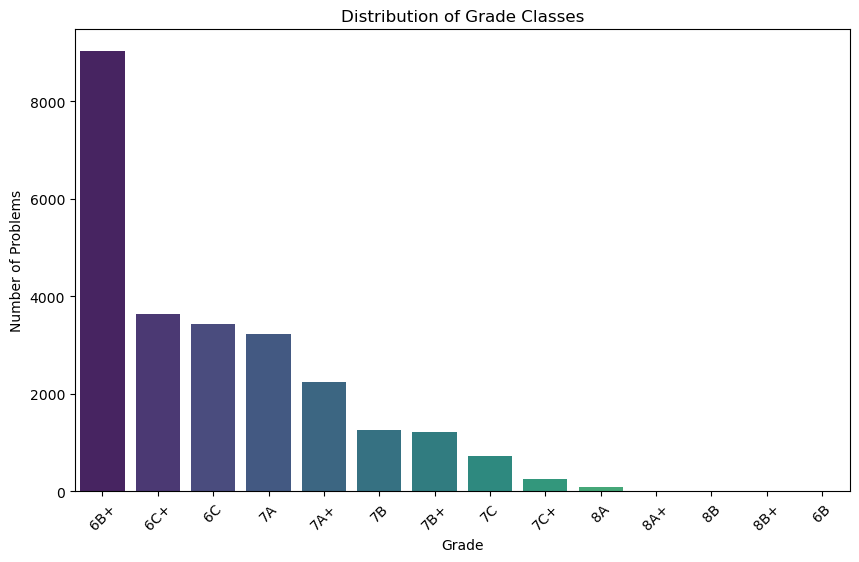

In [39]:
# Calculate the distribution of grade classes
grade_distribution = df['grade'].value_counts()

# Plot the distribution of grade classes
plt.figure(figsize=(10, 6))
sns.barplot(x=grade_distribution.index, y=grade_distribution.values, palette="viridis")
plt.title('Distribution of Grade Classes')
plt.xlabel('Grade')
plt.ylabel('Number of Problems')
plt.xticks(rotation=45)  # Rotate the grade labels for better readability
plt.show()

### Normalize Grade Distribution

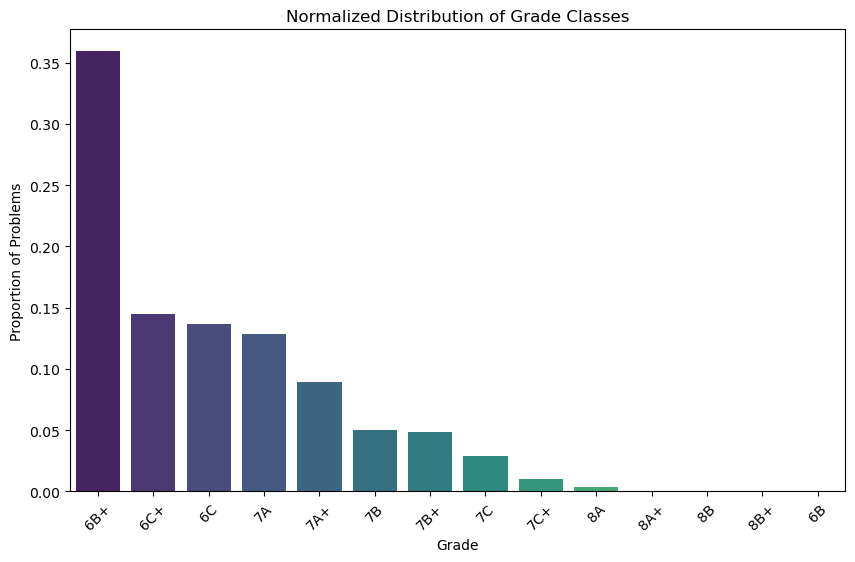

In [40]:
# Calculate the normalized distribution of grade classes
grade_distribution_normalized = df['grade'].value_counts(normalize=True)

# Plot the normalized distribution of grade classes
plt.figure(figsize=(10, 6))
sns.barplot(x=grade_distribution_normalized.index, y=grade_distribution_normalized.values, palette="viridis")
plt.title('Normalized Distribution of Grade Classes')
plt.xlabel('Grade')
plt.ylabel('Proportion of Problems')
plt.xticks(rotation=45)  # Rotate the grade labels for better readability
plt.show()

### Normalized Grade Distribution Pie Chart:

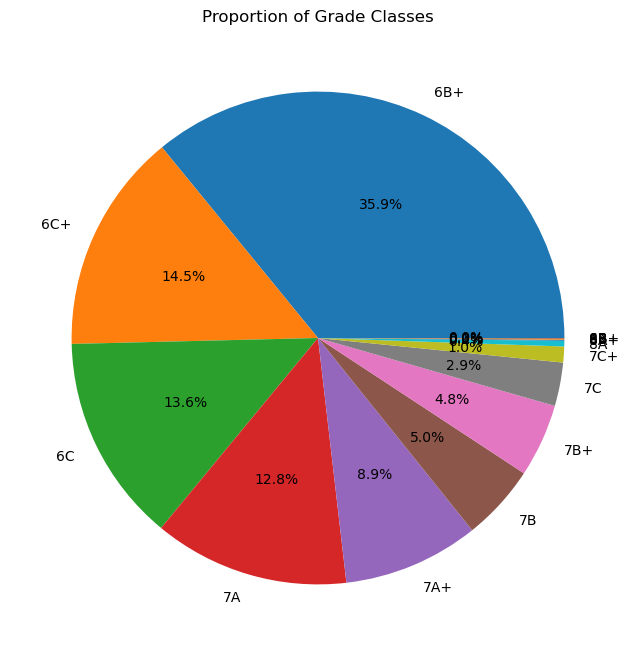

In [41]:
# Pie chart for normalized grade distribution
plt.figure(figsize=(8, 8))
df['grade'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Grade Classes')
plt.ylabel('')  # Hide the y-label as it's not relevant for pie charts
plt.show()

### Cumulative Distribution Function

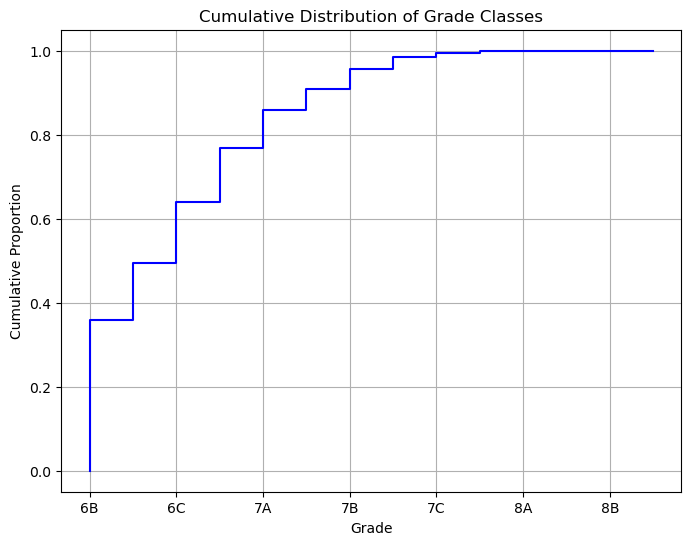

In [42]:
# CDF of the grade distribution
plt.figure(figsize=(8, 6))
grade_distribution = df['grade'].value_counts(normalize=True).sort_index().cumsum()
grade_distribution.plot(drawstyle='steps-pre', color='blue')
plt.title('Cumulative Distribution of Grade Classes')
plt.xlabel('Grade')
plt.ylabel('Cumulative Proportion')
plt.grid(True)
plt.show()

### Box Plots for Positional Features by Grade:

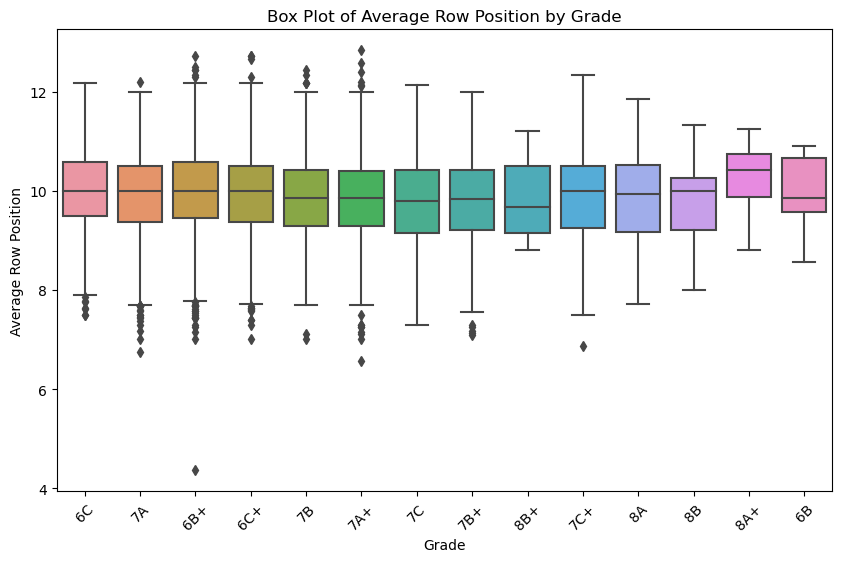

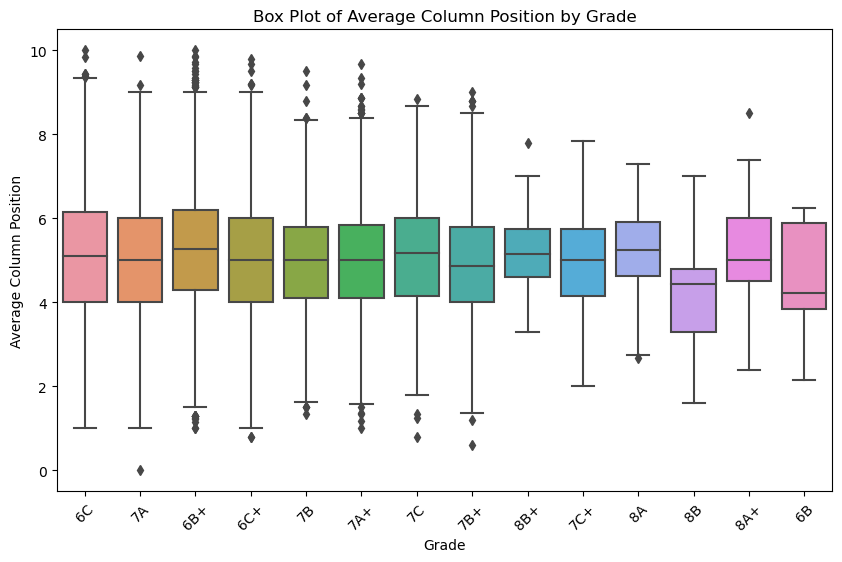

In [43]:
# Box plot for average row position by grade
plt.figure(figsize=(10, 6))
sns.boxplot(x='grade', y='avg_row', data=df)
plt.title('Box Plot of Average Row Position by Grade')
plt.xlabel('Grade')
plt.ylabel('Average Row Position')
plt.xticks(rotation=45)
plt.show()

# Box plot for average column position by grade
plt.figure(figsize=(10, 6))
sns.boxplot(x='grade', y='avg_col', data=df)
plt.title('Box Plot of Average Column Position by Grade')
plt.xlabel('Grade')
plt.ylabel('Average Column Position')
plt.xticks(rotation=45)
plt.show()

### Heatmap of Hold Positions:

In [44]:
def create_heatmap_for_grade(df, grade, wall_width, wall_height):
    # Filter for the specific grade
    grade_df = df[df['grade'] == grade]

    # Extract all positions from the 'sorted_combined' column
    all_positions = [pos for hold_list in grade_df['sorted_combined'] for pos in hold_list]

    # Create a 2D histogram (or heatmap data) of the hold positions
    heatmap_data, xedges, yedges = np.histogram2d(
        [pos[0] for pos in all_positions],  # Column positions
        [pos[1] for pos in all_positions],  # Row positions
        bins=[np.arange(0, wall_width+1), np.arange(0, wall_height+1)]
    )
    
    # Plot the heatmap
    plt.imshow(heatmap_data.T, cmap='hot', interpolation='nearest', origin='lower')
    plt.colorbar(label='Number of Holds')
    plt.title(f'Heatmap of Hold Positions for Grade {grade}')
    plt.xlabel('Column Position')
    plt.ylabel('Row Position')
    plt.xticks(ticks=np.arange(wall_width), labels=np.arange(1, wall_width+1))
    plt.yticks(ticks=np.arange(wall_height), labels=np.arange(1, wall_height+1))
    plt.show()

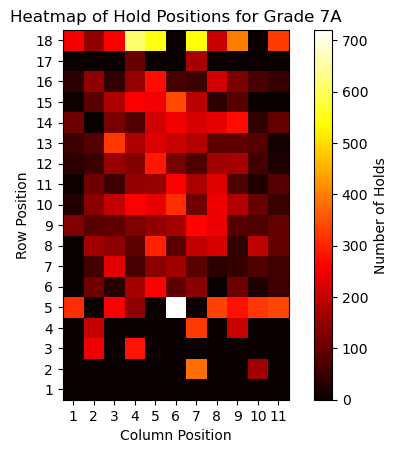

In [45]:
# Set the wall dimensions (width and height)
wall_width = 11 
wall_height = 18  

# Call the function to create a heatmap for grade '7A'
create_heatmap_for_grade(df, '7A', wall_width, wall_height)

Hold Concentration: The brighter spots on the heatmap suggest areas where holds are most frequently placed, indicating popular locations for route setters when designing 7A problems.

Wall Utilization: Areas with uniformly dark or light colors would indicate either under-utilized or preferred zones of the wall for this grade. If a certain row or column consistently shows up as brighter, it's an area of high hold concentration.

Difficulty Focus: The distribution of bright spots might correlate with the typical movements or techniques required for 7A climbs. For example, if brighter spots are clustered in the middle columns and higher rows, this might indicate a preference for problems that require reaching or technical movements associated with the central and upper parts of the wall.

Route Setting Patterns: Patterns in the heatmap could reveal the setters' tendencies, such as favoring certain types of holds or movements in specific areas of the wall.

Training Insights: Climbers training for 7A grade problems might focus on the areas of the wall that are most commonly used for setting this grade, as indicated by the heatmap.

Safety and Accessibility: The distribution may also reflect safety considerations (e.g., avoiding the very top and bottom of the wall) or accessibility (e.g., setting more holds in reach of an average climber's height).

### Ordinal Encoding for 'grade' and Compute Correlation

### Copy the DataFrame

In [46]:
# Copy the DataFrame to avoid changing the original data
df_encoded = df.copy()

### Ordinal Encoding of the 'grade' Column

In [47]:
# Initialize the OrdinalEncoder
encoder = OrdinalEncoder()

# Fit and transform the 'grade' column and replace it with its encoded version
df_encoded['grade_encoded'] = encoder.fit_transform(df_encoded[['grade']])

### Compute the Correlation Matrix

In [48]:
# Compute the correlation matrix including the encoded grade
correlation_matrix = df_encoded[['num_holds', 'avg_row', 'avg_col', 'grade_encoded']].corr()

### Plot the Correlation Heatmap

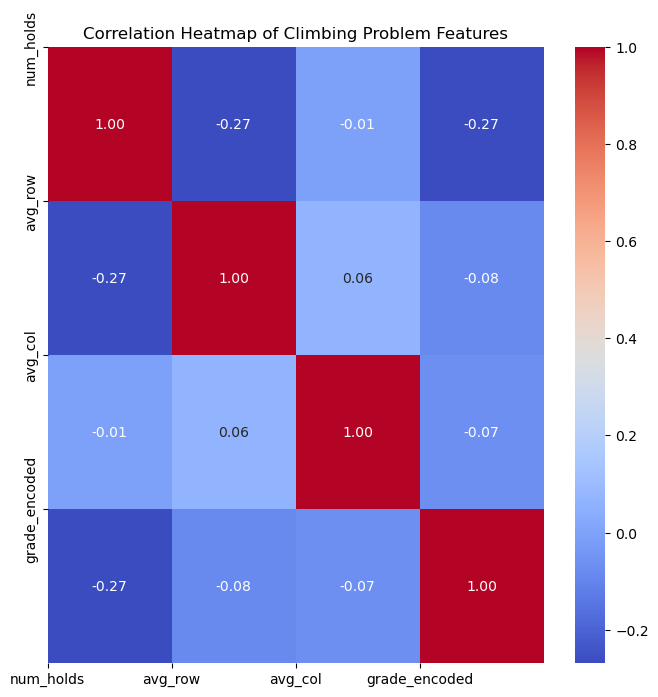

In [49]:
# Plot the correlation heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Climbing Problem Features')
# Adjust the labels if necessary to match the column names in your df_encoded DataFrame
plt.xticks(ticks=np.arange(correlation_matrix.shape[1]), labels=['num_holds', 'avg_row', 'avg_col', 'grade_encoded'])
plt.yticks(ticks=np.arange(correlation_matrix.shape[1]), labels=['num_holds', 'avg_row', 'avg_col', 'grade_encoded'])
plt.show()

Number of Holds (num_holds): The values near 0 suggest that there is not a strong link between this feature and the average row (avg_row) or average column (avg_col) positions. There is a small negative link between the number of holds and the grade, indicating that a higher number of holds may generally result in a poorer grade.

Average Row Position (avg_row): The amount of holds has a negative connection, which may suggest that problems with more holds are typically not as high up the wall. Neither the encoded grade nor the average column position show any discernible association.

Average Column Position (avg_col): Like avg_row, there isn't much of a correlation with other characteristics. This implies that there may not be a direct correlation between the quantity of holds or the degree of difficulty and the left-to-right position of the holds on the wall.

Grade Encoded (grade_encoded): There is a little negative association between the encoded grade and avg_row and the number of holdings. This could indicate that routes that are positioned lower on the wall or have fewer holds are judged harder, but the correlation is not great enough to draw firm conclusions.

In the context of climbing, The kind of grips, the spacing between holds, the angle of the wall, and other variables that are not fully captured by positional measurements alone all contribute to the complexity of a challenge. Therefore, further research would be required to completely understand what determines climbing problem grades, even if this heatmap offers a high-level picture of linear interactions between some factors. Perhaps this research might be done using machine learning models that can capture non-linear relationships.

### Define Mapping Function

In [50]:
# Define the function to map original grades to group numbers
def map_grade_to_group(grade):
    if grade in ['6B', '6B+', '6C', '6C+']:
        return 'Beginner'
    elif grade in ['7A', '7A+', '7B', '7B+']:
        return 'Intermediate'
    elif grade in ['7C', '7C+', '8A', '8A+']:
        return 'Advanced'
    elif grade in ['8B', '8B+']:
        return 'Expert'
    else:
        return 'Unspecified'

### Reverse Mapping Encoded Grades

In [51]:
# Reverse mapping from encoded grades back to the original grade strings
inverse_grade_mapping = {index: grade for index, grade in enumerate(encoder.categories_[0])}
df_encoded['grade_original'] = df_encoded['grade_encoded'].map(inverse_grade_mapping)

### Mapping Encoded Grades to Groups

In [52]:
# Apply the mapping function to the original grade strings to create a 'grade_group' column
df_encoded['grade_group'] = df_encoded['grade_original'].apply(map_grade_to_group)

### Display the DataFrame

In [53]:
# Display the first few rows of the DataFram to verify the results
display_columns = ['grade', 'grade_encoded', 'grade_original', 'grade_group']
print(df_encoded[display_columns].head())

  grade  grade_encoded grade_original   grade_group
0    6C            2.0             6C      Beginner
1    7A            4.0             7A  Intermediate
2   6B+            1.0            6B+      Beginner
3   6B+            1.0            6B+      Beginner
4    7A            4.0             7A  Intermediate


### Display Entries of Each Unique Grade

In [54]:
# Display a few entries from each unique grade
df_sampled_by_grade = df_encoded.groupby('grade').apply(lambda x: x.head(2)).reset_index(drop=True)
print(df_sampled_by_grade)

               start                                                mid  \
0   [[3, 2], [1, 3]]                 [[4, 6], [0, 8], [4, 11], [0, 13]]   
1   [[2, 4], [3, 2]]                [[5, 8], [2, 10], [3, 12], [1, 14]]   
2   [[5, 4], [8, 3]]                 [[7, 7], [7, 9], [7, 12], [4, 14]]   
3           [[5, 4]]       [[4, 7], [1, 10], [4, 12], [6, 12], [6, 16]]   
4   [[0, 4], [3, 5]]                 [[4, 8], [0, 8], [2, 12], [3, 14]]   
5           [[5, 4]]                         [[3, 11], [0, 13], [4, 7]]   
6           [[5, 4]]                 [[7, 9], [3, 10], [2, 6], [5, 14]]   
7           [[5, 4]]  [[4, 7], [7, 9], [5, 11], [8, 13], [4, 13], [6...   
8           [[0, 4]]                         [[1, 7], [3, 11], [5, 13]]   
9           [[5, 4]]                        [[3, 16], [6, 12], [6, 10]]   
10          [[5, 4]]                        [[7, 10], [2, 12], [3, 16]]   
11  [[7, 4], [8, 3]]         [[4, 9], [5, 11], [2, 14], [1, 6], [9, 7]]   
12          [[9, 4]]     

### Inspecting thr different dataframes ive created to understand how they differ

### Inspect Original DataFrame

In [55]:
# Display the first few rows of the original DataFrame
print("Original DataFrame:")
print(df.head())

Original DataFrame:
              start                                           mid        end  \
0  [[0, 4], [3, 5]]            [[4, 8], [0, 8], [2, 12], [3, 14]]  [[0, 17]]   
1          [[0, 4]]                    [[1, 7], [3, 11], [5, 13]]  [[8, 17]]   
2  [[5, 4], [8, 3]]            [[7, 7], [7, 9], [7, 12], [4, 14]]  [[6, 17]]   
3          [[5, 4]]  [[4, 7], [1, 10], [4, 12], [6, 12], [6, 16]]  [[6, 17]]   
4          [[5, 4]]                   [[3, 16], [6, 12], [6, 10]]  [[2, 17]]   

  grade                                    sorted_combined  avg_difficulty  \
0    6C  [[0, 4], [3, 5], [4, 8], [0, 8], [2, 12], [3, ...        3.571429   
1    7A        [[0, 4], [1, 7], [3, 11], [5, 13], [8, 17]]        5.200000   
2   6B+  [[8, 3], [5, 4], [7, 7], [7, 9], [7, 12], [4, ...        6.428571   
3   6B+  [[5, 4], [4, 7], [1, 10], [4, 12], [6, 12], [6...        6.714286   
4    7A       [[5, 4], [6, 10], [6, 12], [3, 16], [2, 17]]        5.000000   

   max_difficulty  min_difficu

###  Inspect Encoded DataFrame

In [56]:
# Display the first few rows of the DataFrame with encoded grades
print("\nDataFrame with Encoded Grades:")
print(df_encoded.head())


DataFrame with Encoded Grades:
              start                                           mid        end  \
0  [[0, 4], [3, 5]]            [[4, 8], [0, 8], [2, 12], [3, 14]]  [[0, 17]]   
1          [[0, 4]]                    [[1, 7], [3, 11], [5, 13]]  [[8, 17]]   
2  [[5, 4], [8, 3]]            [[7, 7], [7, 9], [7, 12], [4, 14]]  [[6, 17]]   
3          [[5, 4]]  [[4, 7], [1, 10], [4, 12], [6, 12], [6, 16]]  [[6, 17]]   
4          [[5, 4]]                   [[3, 16], [6, 12], [6, 10]]  [[2, 17]]   

  grade                                    sorted_combined  avg_difficulty  \
0    6C  [[0, 4], [3, 5], [4, 8], [0, 8], [2, 12], [3, ...        3.571429   
1    7A        [[0, 4], [1, 7], [3, 11], [5, 13], [8, 17]]        5.200000   
2   6B+  [[8, 3], [5, 4], [7, 7], [7, 9], [7, 12], [4, ...        6.428571   
3   6B+  [[5, 4], [4, 7], [1, 10], [4, 12], [6, 12], [6...        6.714286   
4    7A       [[5, 4], [6, 10], [6, 12], [3, 16], [2, 17]]        5.000000   

   max_difficulty 

### Inspect DataFrame with Grade Groups

In [57]:
print("\nDataFrame with Grade Groups:")
print(df_encoded[['grade', 'grade_encoded', 'grade_group']].head())


DataFrame with Grade Groups:
  grade  grade_encoded   grade_group
0    6C            2.0      Beginner
1    7A            4.0  Intermediate
2   6B+            1.0      Beginner
3   6B+            1.0      Beginner
4    7A            4.0  Intermediate


### Check DataFrame Shapes

In [58]:
# Print out the shapes of the DataFrames for comparison
print("\nShapes of the DataFrames:")
print(f"Original df shape: {df.shape}")
print(f"Encoded df shape: {df_encoded.shape}")
print(f"DataFrame with grade groups shape: {df_encoded.shape}")


Shapes of the DataFrames:
Original df shape: (25117, 27)
Encoded df shape: (25117, 30)
DataFrame with grade groups shape: (25117, 30)


### Prepare Data for Modeling

### Define Features and Target Variable

### Convert the difficulty matrix to a DataFrame

In [59]:
difficulty_df = pd.DataFrame(difficulty_matrix)

### Generate new feature names for the difficulty matrix to avoid conflicts

In [60]:
# Create feature names using the sorted coordinates from coord_to_index
difficulty_features = [f"difficulty_{coord[0]}_{coord[1]}" for coord in sorted(coord_to_index)]

# Create the difficulty DataFrame with correct column names
difficulty_df = pd.DataFrame(difficulty_matrix, columns=difficulty_features)


### Prepare DataFrame features from df_encoded, excluding object, target columns, and non-feature columns

In [61]:
feature_columns = [col for col in df_encoded.columns if col not in ('grade', 'start', 'mid', 'end', 'sorted_combined', 'grade_group', 'grade_original', 'grade_encoded')]
df_features = df_encoded[feature_columns]


### Concatenate the features from df_encoded and the difficulty matrix features

In [62]:
combined_features = pd.concat([df_features.reset_index(drop=True), difficulty_df.reset_index(drop=True)], axis=1)

### Encode the 'grade_group' column

In [63]:
encoder = OrdinalEncoder(categories=[['Beginner', 'Intermediate', 'Advanced', 'Expert']])
df_encoded['grade_group_encoded'] = encoder.fit_transform(df_encoded[['grade_group']])

### split the data into training and testing sets and fit your model

In [64]:
X = combined_features
y = df_encoded['grade_group_encoded'].values.ravel()

In [65]:
X.head

<bound method NDFrame.head of        avg_difficulty  max_difficulty  min_difficulty    avg_row   avg_col  \
0            3.571429             5.0             3.0   9.714286  1.714286   
1            5.200000             7.0             3.0  10.400000  3.400000   
2            6.428571             9.0             4.0   9.428571  6.285714   
3            6.714286             8.0             4.0  11.142857  4.571429   
4            5.000000             7.0             3.0  11.800000  4.400000   
...               ...             ...             ...        ...       ...   
25112        5.166667             8.0             3.0  10.666667  4.833333   
25113        4.833333             6.0             3.0   9.666667  4.333333   
25114        3.500000             5.0             2.0   9.250000  2.250000   
25115        3.571429             5.0             3.0  10.000000  3.857143   
25116        4.875000             9.0             2.0  10.625000  3.750000   

       num_holds  difficulty_grad

### Stratified Train-Test Split

In [67]:
# Perform a stratified split to maintain the proportion of each grade
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Creating a copy of Train and Test with no hold features

In [67]:
# Identifying Non-Hold Features
non_hold_features = [column for column in X.columns if not column.startswith('difficulty_') or column == 'difficulty_gradient']

In [68]:
print(non_hold_features)

['avg_difficulty', 'max_difficulty', 'min_difficulty', 'avg_row', 'avg_col', 'num_holds', 'difficulty_gradient', 'movement_complexity', 'vertical_progression', 'hold_density', 'route_sequence_difficulty', 'reach_index', 'isolation_index', 'num_crimps', 'num_pinches', 'num_slopers', 'num_pockets', 'weighted_crimps', 'weighted_pinches', 'weighted_slopers', 'weighted_pockets', 'avg_grip_orientation_change']


### Creating train and test sets with the Non hold features dataframe

In [69]:
X_train_nh = X_train[non_hold_features]
X_test_nh = X_test[non_hold_features]

### SMOTE Resampling

### Check Minimum Class Count

In [70]:
(unique, counts) = np.unique(y_train, return_counts=True)
class_counts = dict(zip(unique, counts))
min_class_count = counts.min()
print("Minimum class count:", min_class_count)
print("Class counts:", class_counts)

Minimum class count: 16
Class counts: {0.0: 12869, 1.0: 6338, 2.0: 870, 3.0: 16}


### Apply SMOTE with Adjusted Neighbors

In [71]:
# Apply SMOTE to oversample the minority classes in the training set
# Since the minimum class count is 3, set k_neighbors to 2
smote = SMOTE(random_state=42, k_neighbors=2)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [72]:
X_train_smote_nh, y_train_smote_nh = smote.fit_resample(X_train_nh, y_train)

### Undersample the Training Set

In [73]:
# Apply Random Under Sampling to balance the training set
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)

In [74]:
X_train_under_nh, y_train_under_nh = under_sampler.fit_resample(X_train_nh, y_train)

### Feature Scaling

In [75]:
scaler = StandardScaler()

In [76]:
# Scale the features using StandardScaler and keep as DataFrame
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Scale the SMOTE and undersampled sets too, maintaining DataFrame format
X_train_smote_scaled = pd.DataFrame(scaler.transform(X_train_smote), columns=X_train_smote.columns)
X_train_under_scaled = pd.DataFrame(scaler.transform(X_train_under), columns=X_train_under.columns)

In [77]:
# Scale the non-hold features using StandardScaler and keep as DataFrame
X_train_nh_scaled = pd.DataFrame(scaler.fit_transform(X_train_nh), columns=X_train_nh.columns)
X_test_nh_scaled = pd.DataFrame(scaler.transform(X_test_nh), columns=X_test_nh.columns)

# Scale the SMOTE and undersampled sets for non-hold features too, maintaining DataFrame format
X_train_smote_nh_scaled = pd.DataFrame(scaler.transform(X_train_smote_nh), columns=X_train_smote_nh.columns)
X_train_under_nh_scaled = pd.DataFrame(scaler.transform(X_train_under_nh), columns=X_train_under_nh.columns)

### Summary of Dataset Shapes

In [78]:
# Print the shapes of the various datasets
print("Original shapes:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

print("\nAfter SMOTE resampling:")
print("X_train_smote:", X_train_smote.shape)

print("\nAfter Undersampling:")
print("X_train_under:", X_train_under.shape)

print("\nAfter Feature Scaling:")
print("X_train_scaled:", X_train_scaled.shape)
print("X_test_scaled:", X_test_scaled.shape)
print("X_train_smote_scaled:", X_train_smote_scaled.shape)
print("X_train_under_scaled:", X_train_under_scaled.shape)

Original shapes:
X_train: (20093, 162)
X_test: (5024, 162)

After SMOTE resampling:
X_train_smote: (51476, 162)

After Undersampling:
X_train_under: (64, 162)

After Feature Scaling:
X_train_scaled: (20093, 162)
X_test_scaled: (5024, 162)
X_train_smote_scaled: (51476, 162)
X_train_under_scaled: (64, 162)


In [79]:
# Print the shapes of the various datasets
print("Original shapes:")
print("X_train_nh:", X_train_nh.shape)
print("X_test_nh:", X_test_nh.shape)

print("\nAfter SMOTE resampling:")
print("X_train_smote_nh:", X_train_smote_nh.shape)

print("\nAfter Undersampling:")
print("X_train_under_nh:", X_train_under_nh.shape)

print("\nAfter Feature Scaling:")
print("X_train_nh_scaled:", X_train_nh_scaled.shape)
print("X_test_nh_scaled:", X_test_nh_scaled.shape)
print("X_train_smote_nh_scaled:", X_train_smote_nh_scaled.shape)
print("X_train_under_nh_scaled:", X_train_under_nh_scaled.shape)

Original shapes:
X_train_nh: (20093, 22)
X_test_nh: (5024, 22)

After SMOTE resampling:
X_train_smote_nh: (51476, 22)

After Undersampling:
X_train_under_nh: (64, 22)

After Feature Scaling:
X_train_nh_scaled: (20093, 22)
X_test_nh_scaled: (5024, 22)
X_train_smote_nh_scaled: (51476, 22)
X_train_under_nh_scaled: (64, 22)


# XGBoost models using the SMOTE training set and the base training set

### Define and train the XGBoost model on the base training set

### Initialize the XGBoost model for the base dataset

In [79]:
xgb_base = XGBClassifier(random_state=42)

### Fit the model on the base training data

In [80]:
xgb_base.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

### Cross-validation on the training set

In [81]:
cv_scores_base = cross_val_score(xgb_base, X_train_scaled, y_train, cv=5)
print("Cross-Validation Scores (5 folds):", cv_scores_base)
print("Average CV Score:", cv_scores_base.mean())

Cross-Validation Scores (5 folds): [0.79472506 0.79795969 0.79447624 0.79392733 0.79716277]
Average CV Score: 0.7956502159788293


### Evaluate the model on the training set

In [82]:
y_train_pred_base = xgb_base.predict(X_train_scaled)
print("\nTraining Set Classification Report (Base Model):")
print(classification_report(y_train, y_train_pred_base))
print("Training Set Accuracy (Base Model):", accuracy_score(y_train, y_train_pred_base))


Training Set Classification Report (Base Model):
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96     12869
         1.0       0.92      0.91      0.91      6338
         2.0       0.99      0.90      0.94       870
         3.0       1.00      1.00      1.00        16

    accuracy                           0.95     20093
   macro avg       0.97      0.94      0.95     20093
weighted avg       0.95      0.95      0.95     20093

Training Set Accuracy (Base Model): 0.9455034091474643


### Evaluate the model on the test set

In [83]:
y_test_pred_base = xgb_base.predict(X_test_scaled)
print("\nTest Set Classification Report (Base Model):")
print(classification_report(y_test, y_test_pred_base))
print("Test Set Accuracy (Base Model):", accuracy_score(y_test, y_test_pred_base))


Test Set Classification Report (Base Model):
              precision    recall  f1-score   support

         0.0       0.86      0.89      0.88      3218
         1.0       0.68      0.70      0.69      1585
         2.0       0.57      0.20      0.29       217
         3.0       0.00      0.00      0.00         4

    accuracy                           0.80      5024
   macro avg       0.53      0.45      0.47      5024
weighted avg       0.79      0.80      0.79      5024

Test Set Accuracy (Base Model): 0.7997611464968153


C:\Users\micha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\micha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\micha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Creating a XGB model using the base dataset and no holds training data

In [84]:
xgb_base_nh = XGBClassifier(random_state=42)

In [85]:
xgb_base_nh.fit(X_train_nh_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [86]:
cv_scores_base_nh = cross_val_score(xgb_base_nh, X_train_nh_scaled, y_train, cv=5)
print("Cross-Validation Scores no hold features (5 folds):", cv_scores_base_nh)
print("Average CV Score no hold features:", cv_scores_base_nh.mean())

Cross-Validation Scores no hold features (5 folds): [0.76337397 0.76113461 0.77830306 0.76256844 0.76704828]
Average CV Score no hold features: 0.7664856738852819


training set

In [87]:
y_train_pred_base_nh = xgb_base_nh.predict(X_train_nh_scaled)
print("\nTraining Set Classification Report no holds(Base Model):")
print(classification_report(y_train, y_train_pred_base_nh))
print("Training Set Accuracy no holds(Base Model):", accuracy_score(y_train, y_train_pred_base_nh))


Training Set Classification Report no holds(Base Model):
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94     12869
         1.0       0.89      0.85      0.87      6338
         2.0       1.00      0.81      0.89       870
         3.0       1.00      1.00      1.00        16

    accuracy                           0.92     20093
   macro avg       0.95      0.90      0.93     20093
weighted avg       0.92      0.92      0.92     20093

Training Set Accuracy no holds(Base Model): 0.9168367093017469


test set

In [88]:
y_test_pred_base_nh = xgb_base_nh.predict(X_test_nh_scaled)
print("\nTest Set Classification Report no holds(Base Model):")
print(classification_report(y_test, y_test_pred_base_nh))
print("Test Set Accuracy no holds(Base Model):", accuracy_score(y_test, y_test_pred_base_nh))


Test Set Classification Report no holds(Base Model):
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85      3218
         1.0       0.64      0.63      0.63      1585
         2.0       0.50      0.22      0.30       217
         3.0       0.00      0.00      0.00         4

    accuracy                           0.77      5024
   macro avg       0.49      0.43      0.45      5024
weighted avg       0.76      0.77      0.76      5024

Test Set Accuracy no holds(Base Model): 0.7677149681528662


C:\Users\micha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\micha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\micha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Initialize the XGBoost model for the SMOTE dataset

In [89]:
xgb_smote = XGBClassifier(random_state=42)

### Fit the model on the SMOTE-resampled training data

In [90]:
xgb_smote.fit(X_train_smote_scaled, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

### Cross-validation on the SMOTE-resampled training set

In [91]:
cv_scores_smote = cross_val_score(xgb_smote, X_train_smote_scaled, y_train_smote, cv=5)
print("Cross-Validation Scores (5 folds):", cv_scores_smote)
print("Average CV Score:", cv_scores_smote.mean())

Cross-Validation Scores (5 folds): [0.83760684 0.89218067 0.92821758 0.94103934 0.94259349]
Average CV Score: 0.9083275841313723


### Evaluate the model on the training set

In [92]:
y_train_pred_smote = xgb_smote.predict(X_train_smote_scaled)
print("\nTraining Set Classification Report (SMOTE Model):")
print(classification_report(y_train_smote, y_train_pred_smote))
print("Training Set Accuracy (SMOTE Model):", accuracy_score(y_train_smote, y_train_pred_smote))


Training Set Classification Report (SMOTE Model):
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94     12869
         1.0       0.94      0.93      0.93     12869
         2.0       0.99      0.99      0.99     12869
         3.0       1.00      1.00      1.00     12869

    accuracy                           0.97     51476
   macro avg       0.97      0.97      0.97     51476
weighted avg       0.97      0.97      0.97     51476

Training Set Accuracy (SMOTE Model): 0.9665280907607429


### Evaluate the model on the test set

In [93]:
y_test_pred_smote = xgb_smote.predict(X_test_scaled)
print("\nTest Set Classification Report (SMOTE Model):")
print(classification_report(y_test, y_test_pred_smote))
print("Test Set Accuracy (SMOTE Model):", accuracy_score(y_test, y_test_pred_smote))


Test Set Classification Report (SMOTE Model):
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.87      3218
         1.0       0.68      0.70      0.69      1585
         2.0       0.53      0.29      0.38       217
         3.0       0.00      0.00      0.00         4

    accuracy                           0.80      5024
   macro avg       0.52      0.47      0.48      5024
weighted avg       0.79      0.80      0.79      5024

Test Set Accuracy (SMOTE Model): 0.7975716560509554


In [94]:
print("Number of features in the test set:", X_test_scaled.shape[1])

Number of features in the test set: 162


### Training SMOTE No hold features df using XGBoost

In [95]:
xgb_smote_nh = XGBClassifier(random_state=42)

In [96]:
xgb_smote_nh.fit(X_train_smote_nh_scaled, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [97]:
cv_scores_smote_nh = cross_val_score(xgb_smote_nh, X_train_smote_nh_scaled, y_train_smote, cv=5)
print("Cross-Validation Scores no holds(5 folds):", cv_scores_smote)
print("Average CV Score no holds:", cv_scores_smote_nh.mean())

Cross-Validation Scores no holds(5 folds): [0.83760684 0.89218067 0.92821758 0.94103934 0.94259349]
Average CV Score no holds: 0.8861615350274894


training set

In [98]:
y_train_pred_smote_nh = xgb_smote_nh.predict(X_train_smote_nh_scaled)
print("\nTraining Set Classification Report no holds(SMOTE Model):")
print(classification_report(y_train_smote, y_train_pred_smote_nh))
print("Training Set Accuracy no holds(SMOTE Model):", accuracy_score(y_train_smote, y_train_pred_smote_nh))


Training Set Classification Report no holds(SMOTE Model):
              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92     12869
         1.0       0.92      0.89      0.90     12869
         2.0       0.98      0.99      0.98     12869
         3.0       1.00      1.00      1.00     12869

    accuracy                           0.95     51476
   macro avg       0.95      0.95      0.95     51476
weighted avg       0.95      0.95      0.95     51476

Training Set Accuracy no holds(SMOTE Model): 0.9514725308881808


test set

In [99]:
y_test_pred_smote_nh = xgb_smote_nh.predict(X_test_nh_scaled)
print("\nTest Set Classification Report no holds(SMOTE Model):")
print(classification_report(y_test, y_test_pred_smote_nh))
print("Test Set Accuracy no holds(SMOTE Model):", accuracy_score(y_test, y_test_pred_smote_nh))


Test Set Classification Report no holds(SMOTE Model):
              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85      3218
         1.0       0.63      0.63      0.63      1585
         2.0       0.43      0.31      0.36       217
         3.0       0.00      0.00      0.00         4

    accuracy                           0.76      5024
   macro avg       0.48      0.45      0.46      5024
weighted avg       0.76      0.76      0.76      5024

Test Set Accuracy no holds(SMOTE Model): 0.7623407643312102


C:\Users\micha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\micha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\micha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Evaluation and insights 

Effectiveness of SMOTE: The results with SMOTE suggest that balancing class distribution can enhance the performance and robustness of XGBoost models. The improvement in cross-validation and test set scores indicates that the model is benefiting from the more representative training environment.
Handling of Minority Class: Despite the improvements, the inability to effectively predict the smallest class (class 3) suggests that simply balancing classes may not be enough for classes with very few samples. Techniques such as creating more synthetic samples specifically for such classes or combining SMOTE with targeted undersampling of the majority classes might help.
Potential Overfitting: The perfect training scores indicate potential overfitting, suggesting that tuning XGBoost’s hyperparameters to manage model complexity might be necessary. Parameters that control the depth of the trees, the minimum number of samples required at a leaf node, or adding regularization could help in reducing overfitting.
In conclusion, SMOTE enhances the XGBoost model's ability to generalize, especially evident in the improved cross-validation scores. This points to the usefulness of balancing techniques in training ensemble models like XGBoost, especially when combined with careful tuning to address overfitting and very small classes.

### New methods to handle data imbalance 

# ADASYN

In [100]:
# First, fit the scaler on the original training data before oversampling
scaler = StandardScaler()
scaler.fit(X_train)

# Initialize ADASYN with n_neighbors less than the smallest class count
adasyn = ADASYN(random_state=42, n_neighbors=2)

# Apply ADASYN to oversample the minority classes in the training set
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Transform the ADASYN oversampled set using the already fitted scaler
X_train_adasyn_scaled = pd.DataFrame(scaler.transform(X_train_adasyn), columns=X_train.columns)

# Transform the test set using the already fitted scaler
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Initialize the XGBoost classifier
xgb = XGBClassifier()

# Define the Stratified K-Folds cross-validator
cv = StratifiedKFold(n_splits=5)

# Perform cross-validation on the ADASYN scaled dataset
scores_adasyn = cross_validate(xgb, X_train_adasyn_scaled, y_train_adasyn, scoring='accuracy', cv=cv, return_estimator=True)

# Print each folds' accuracy scores as well as the mean and standard deviation
print("ADASYN - Training set: Cross-validation accuracy scores:", scores_adasyn['test_score'])
print(f"ADASYN - Training set: Mean accuracy: {scores_adasyn['test_score'].mean()}, Standard Deviation: {scores_adasyn['test_score'].std()}")

# Train the final model on the entire ADASYN scaled training set
xgb.fit(X_train_adasyn_scaled, y_train_adasyn)

# Make predictions on the scaled test set
y_pred = xgb.predict(X_test_scaled)

# Print the accuracy and classification report for the test set
print(f"Test set accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


ADASYN - Training set: Cross-validation accuracy scores: [0.72012548 0.83785903 0.84874032 0.92373297 0.89530438]
ADASYN - Training set: Mean accuracy: 0.8451524360356828, Standard Deviation: 0.06983970857743343
Test set accuracy: 0.8007563694267515
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88      3218
         1.0       0.68      0.70      0.69      1585
         2.0       0.56      0.28      0.37       217
         3.0       0.00      0.00      0.00         4

    accuracy                           0.80      5024
   macro avg       0.53      0.47      0.49      5024
weighted avg       0.80      0.80      0.80      5024



# Borderline smote

In [101]:
# First, fit the scaler on the original training data before oversampling
scaler = StandardScaler()
scaler.fit(X_train)

# Initialize Borderline-SMOTE with n_neighbors less than the smallest class count
bsmote = BorderlineSMOTE(random_state=42, k_neighbors=2, kind='borderline-1')

# Apply Borderline-SMOTE to oversample the minority classes in the training set
X_train_bsmote, y_train_bsmote = bsmote.fit_resample(X_train, y_train)

# Transform the Borderline-SMOTE oversampled set using the already fitted scaler
X_train_bsmote_scaled = pd.DataFrame(scaler.transform(X_train_bsmote), columns=X_train.columns)

# Transform the test set using the already fitted scaler
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Initialize the XGBoost classifier
xgb = XGBClassifier()

# Define the Stratified K-Folds cross-validator
cv = StratifiedKFold(n_splits=5)

# Perform cross-validation on the Borderline-SMOTE scaled dataset
scores_bsmote = cross_validate(xgb, X_train_bsmote_scaled, y_train_bsmote, scoring='accuracy', cv=cv, return_estimator=True)

# Print each fold's accuracy scores as well as the mean and standard deviation
print("Borderline-SMOTE - Training set: Cross-validation accuracy scores:", scores_bsmote['test_score'])
print(f"Borderline-SMOTE - Training set: Mean accuracy: {scores_bsmote['test_score'].mean()}, Standard Deviation: {scores_bsmote['test_score'].std()}")

# Train the final model on the entire Borderline-SMOTE scaled training set
xgb.fit(X_train_bsmote_scaled, y_train_bsmote)

# Make predictions on the scaled test set
y_pred = xgb.predict(X_test_scaled)

# Print the accuracy and classification report for the test set
print(f"Test set accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Borderline-SMOTE - Training set: Cross-validation accuracy scores: [0.83964646 0.88742108 0.92928606 0.95201554 0.94842156]
Borderline-SMOTE - Training set: Mean accuracy: 0.9113581418850968, Standard Deviation: 0.042576235990861154
Test set accuracy: 0.8001592356687898
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.87      3218
         1.0       0.68      0.70      0.69      1585
         2.0       0.59      0.36      0.45       217
         3.0       0.00      0.00      0.00         4

    accuracy                           0.80      5024
   macro avg       0.53      0.49      0.50      5024
weighted avg       0.80      0.80      0.80      5024



C:\Users\micha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\micha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\micha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Cost sensitive learning

In [102]:
# Fit the scaler on the original training data before oversampling
scaler = StandardScaler()
scaler.fit(X_train)

# Scale the training and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize XGBoost classifier with scale_pos_weight parameter
# Calculate the ratio of negative to positive samples
ratio = float(np.sum(y_train == 0)) / np.sum(y_train == 1)
xgb = XGBClassifier(scale_pos_weight=ratio)

# Define the Stratified K-Folds cross-validator
cv = StratifiedKFold(n_splits=5)

# Perform cross-validation on the scaled dataset
scores = cross_validate(xgb, X_train_scaled, y_train, scoring='accuracy', cv=cv, return_estimator=True)

# Print each fold's accuracy scores as well as the mean and standard deviation
print("Cost-sensitive XGB - Training set: Cross-validation accuracy scores:", scores['test_score'])
print(f"Cost-sensitive XGB - Training set: Mean accuracy: {scores['test_score'].mean()}, Standard Deviation: {scores['test_score'].std()}")

# Train the final model on the entire scaled training set
xgb.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred = xgb.predict(X_test_scaled)

# Print the accuracy and classification report for the test set
print(f"Test set accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


[13:41:31] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[13:41:36] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[13:41:41] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[13:41:47] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[13:41:52] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

Cost-sensitive XGB - Training set: Cross-validation accuracy scores: [0.79472506 0.79795969 0.79447624 0.79392733 0.79716277]
Cost-sensitive XGB - Training set: Mean accuracy: 0.7956502159788293, Standard Deviation: 0.0016014981247835926
[13:41:57] W

C:\Users\micha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\micha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\micha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Combining over and under sampling

In [103]:
# Fit the scaler on the original training data before resampling
scaler = StandardScaler()
scaler.fit(X_train)

# Scale the training data
X_train_scaled = scaler.transform(X_train)

# Ensure y_train is in integer format for np.bincount
y_train_int = y_train.astype(int)

# Determine the smallest class size and adjust k_neighbors for SMOTE
min_class_size = np.min(np.bincount(y_train_int))
smote_k_neighbors = max(1, min_class_size - 1)  # Ensure there's at least one neighbor

# Define a pipeline that combines SMOTE and RandomUnderSampler
over = SMOTE(k_neighbors=smote_k_neighbors, random_state=42)
under = RandomUnderSampler(random_state=42)

pipeline = Pipeline(steps=[('o', over), ('u', under)])

# Apply the pipeline to resample the dataset
X_resampled, y_resampled = pipeline.fit_resample(X_train_scaled, y_train_int)

# Initialize the XGBoost classifier
xgb = XGBClassifier()

# Define the Stratified K-Folds cross-validator
cv = StratifiedKFold(n_splits=5)

# Perform cross-validation on the resampled dataset
scores = cross_validate(xgb, X_resampled, y_resampled, scoring='accuracy', cv=cv, return_estimator=True)

# Print each fold's accuracy scores as well as the mean and standard deviation
print("Combined Sampling - Training set: Cross-validation accuracy scores:", scores['test_score'])
print(f"Combined Sampling - Training set: Mean accuracy: {scores['test_score'].mean()}, Standard Deviation: {scores['test_score'].std()}")

# Train the final model on the entire resampled training set
xgb.fit(X_resampled, y_resampled)

# Scale the test data with the already fitted scaler
X_test_scaled = scaler.transform(X_test)

# Make predictions on the scaled test set
y_pred = xgb.predict(X_test_scaled)

# Print the accuracy and classification report for the test set
print(f"Test set accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Combined Sampling - Training set: Cross-validation accuracy scores: [0.91268454 0.91044196 0.91597863 0.91102477 0.90791646]
Combined Sampling - Training set: Mean accuracy: 0.9116092727627454, Standard Deviation: 0.002667904555839038
Test set accuracy: 0.7951831210191083
              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87      3218
         1.0       0.68      0.68      0.68      1585
         2.0       0.60      0.35      0.44       217
         3.0       0.00      0.00      0.00         4

    accuracy                           0.80      5024
   macro avg       0.54      0.48      0.50      5024
weighted avg       0.79      0.80      0.79      5024



## RFE for best number and combination of features

In [119]:
# Initialize the scaler and classifiers
scaler = StandardScaler()
smote = SMOTE(random_state=42)
undersampler = RandomUnderSampler(random_state=42)

# Create a pipeline for resampling and feature scaling
resampling_and_scaling_pipeline = ImPipeline([
    ('scaler', scaler),
    ('smote', smote),
    ('undersampler', undersampler)
])

# Apply resampling and scaling to training data
X_train_nh_resampled, y_train_resampled = resampling_and_scaling_pipeline.fit_resample(X_train_nh, y_train)

# Initialize XGBoost classifier and RFECV
xgb = XGBClassifier()
cv = StratifiedKFold(n_splits=5)

# Setup RFECV to find the best number of features using XGBoost
selector = RFECV(estimator=xgb, step=1, cv=cv, scoring='accuracy', min_features_to_select=1)
selector.fit(X_train_nh_resampled, y_train_resampled)

# Print optimal number of features
print("Optimal number of features : %d" % selector.n_features_)

# Print a ranking of features
print("Ranking of features names:")
for i in sorted(zip(map(lambda x: round(x, 4), selector.ranking_), X_train_nh.columns)):
    print(i)

# Apply selector to training and test data
X_train_transformed = selector.transform(X_train_nh_resampled)
X_test_transformed = selector.transform(scaler.transform(X_test_nh))  # Ensure to scale the test data as well

# Train model on the transformed dataset
xgb.fit(X_train_transformed, y_train_resampled)

# Make predictions on the transformed test set
y_pred = xgb.predict(X_test_transformed)

# Print the classification report for the test set
print(classification_report(y_test, y_pred))

Optimal number of features : 21
Ranking of features names:
(1, 'avg_col')
(1, 'avg_difficulty')
(1, 'avg_grip_orientation_change')
(1, 'avg_row')
(1, 'difficulty_gradient')
(1, 'hold_density')
(1, 'isolation_index')
(1, 'max_difficulty')
(1, 'min_difficulty')
(1, 'movement_complexity')
(1, 'num_crimps')
(1, 'num_holds')
(1, 'num_pinches')
(1, 'num_pockets')
(1, 'num_slopers')
(1, 'reach_index')
(1, 'route_sequence_difficulty')
(1, 'vertical_progression')
(1, 'weighted_crimps')
(1, 'weighted_pinches')
(1, 'weighted_pockets')
(2, 'weighted_slopers')
              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85      3218
         1.0       0.62      0.62      0.62      1585
         2.0       0.41      0.27      0.33       217
         3.0       0.00      0.00      0.00         4

    accuracy                           0.76      5024
   macro avg       0.47      0.44      0.45      5024
weighted avg       0.75      0.76      0.75      5024



# using best params and bsmote to train a XGBoost model

In [78]:
# First, fit the scaler on the original training data before oversampling
scaler = StandardScaler()
scaler.fit(X_train)

# Initialize Borderline-SMOTE with n_neighbors less than the smallest class count
bsmote = BorderlineSMOTE(random_state=42, k_neighbors=2, kind='borderline-1')

# Apply Borderline-SMOTE to oversample the minority classes in the training set
X_train_bsmote, y_train_bsmote = bsmote.fit_resample(X_train, y_train)

# Transform the Borderline-SMOTE oversampled set using the already fitted scaler
X_train_bsmote_scaled = pd.DataFrame(scaler.transform(X_train_bsmote), columns=X_train.columns)

# Transform the test set using the already fitted scaler
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Initialize the XGBoost classifier with specific parameters
xgb = XGBClassifier(
    max_depth=5,
    learning_rate=0.25,
    n_estimators=250,
    subsample=0.85,
    colsample_bytree=0.9,
    random_state=42  # Adding for reproducibility
)

# Define the Stratified K-Folds cross-validator
cv = StratifiedKFold(n_splits=5)

# Perform cross-validation on the Borderline-SMOTE scaled dataset
scores_bsmote = cross_validate(xgb, X_train_bsmote_scaled, y_train_bsmote, scoring='accuracy', cv=cv, return_estimator=True)

# Print each fold's accuracy scores as well as the mean and standard deviation
print("Borderline-SMOTE - Training set: Cross-validation accuracy scores:", scores_bsmote['test_score'])
print(f"Borderline-SMOTE - Training set: Mean accuracy: {scores_bsmote['test_score'].mean()}, Standard Deviation: {scores_bsmote['test_score'].std()}")

# Train the final model on the entire Borderline-SMOTE scaled training set
xgb.fit(X_train_bsmote_scaled, y_train_bsmote)

# Make predictions on the scaled test set
y_pred = xgb.predict(X_test_scaled)

# Print the accuracy and classification report for the test set
print(f"Test set accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Borderline-SMOTE - Training set: Cross-validation accuracy scores: [0.83712121 0.89159786 0.93190869 0.95522098 0.9510442 ]
Borderline-SMOTE - Training set: Mean accuracy: 0.9133785891945193, Standard Deviation: 0.04427738941238069
Test set accuracy: 0.8055334394904459
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88      3218
         1.0       0.69      0.70      0.70      1585
         2.0       0.63      0.36      0.46       217
         3.0       0.00      0.00      0.00         4

    accuracy                           0.81      5024
   macro avg       0.55      0.49      0.51      5024
weighted avg       0.80      0.81      0.80      5024



C:\Users\micha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\micha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\micha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix XGB:
[[2852  365    1    0]
 [ 424 1116   45    0]
 [   4  134   79    0]
 [   0    3    1    0]]


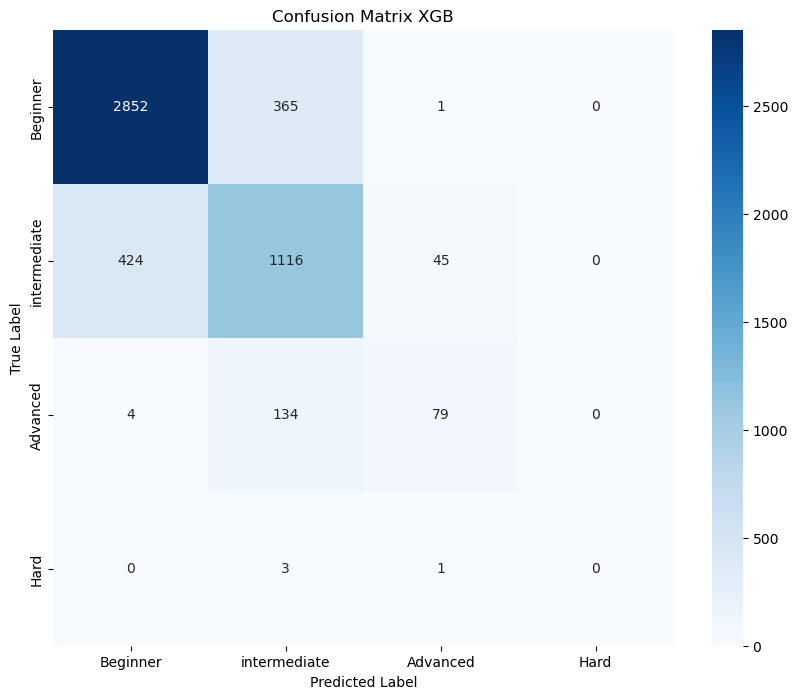

In [83]:
# Generate the confusion matrix for the predictions
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix in text
print("Confusion Matrix XGB:")
print(cm)

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Beginner', 'intermediate', 'Advanced', 'Hard'], yticklabels=['Beginner', 'intermediate', 'Advanced', 'Hard'])
plt.title('Confusion Matrix XGB')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### Inspecting feature importance

In [104]:
y_test_pred_smote = xgb_smote.predict(X_test_scaled)
print("\nTest Set Classification Report (SMOTE Model):")
print(classification_report(y_test, y_test_pred_smote))
print("Test Set Accuracy (SMOTE Model):", accuracy_score(y_test, y_test_pred_smote))


Test Set Classification Report (SMOTE Model):
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.87      3218
         1.0       0.68      0.70      0.69      1585
         2.0       0.53      0.29      0.38       217
         3.0       0.00      0.00      0.00         4

    accuracy                           0.80      5024
   macro avg       0.52      0.47      0.48      5024
weighted avg       0.79      0.80      0.79      5024

Test Set Accuracy (SMOTE Model): 0.7975716560509554


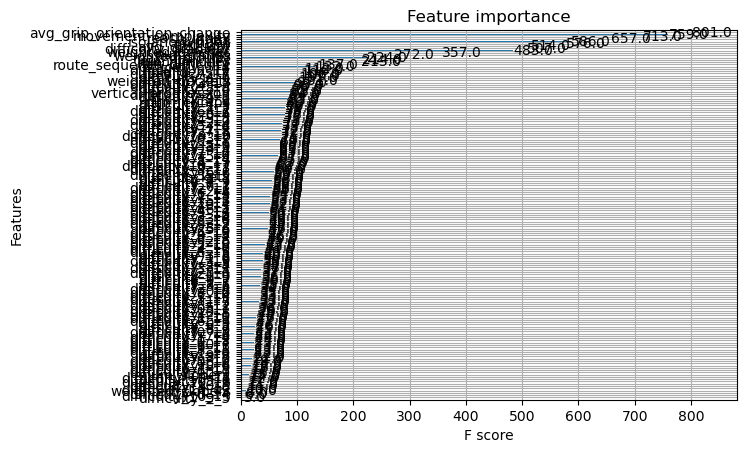

In [105]:
# Plot feature importances
xgboost.plot_importance(xgb_smote)
plt.show()

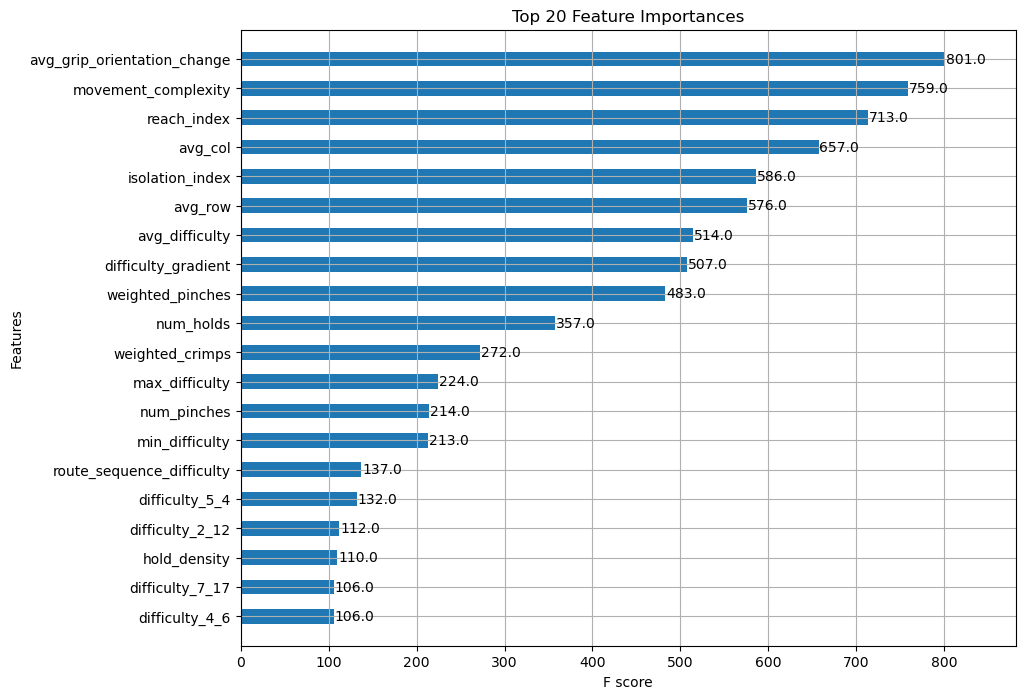

In [106]:
fig, ax = plt.subplots(figsize=(10, 8))  # Increase the figure size for better readability
xgboost.plot_importance(xgb_smote, max_num_features=20, height=0.5, ax=ax, importance_type='weight')
plt.title('Top 20 Feature Importances')
plt.show()

### Evaluating feature importance of Non hold features

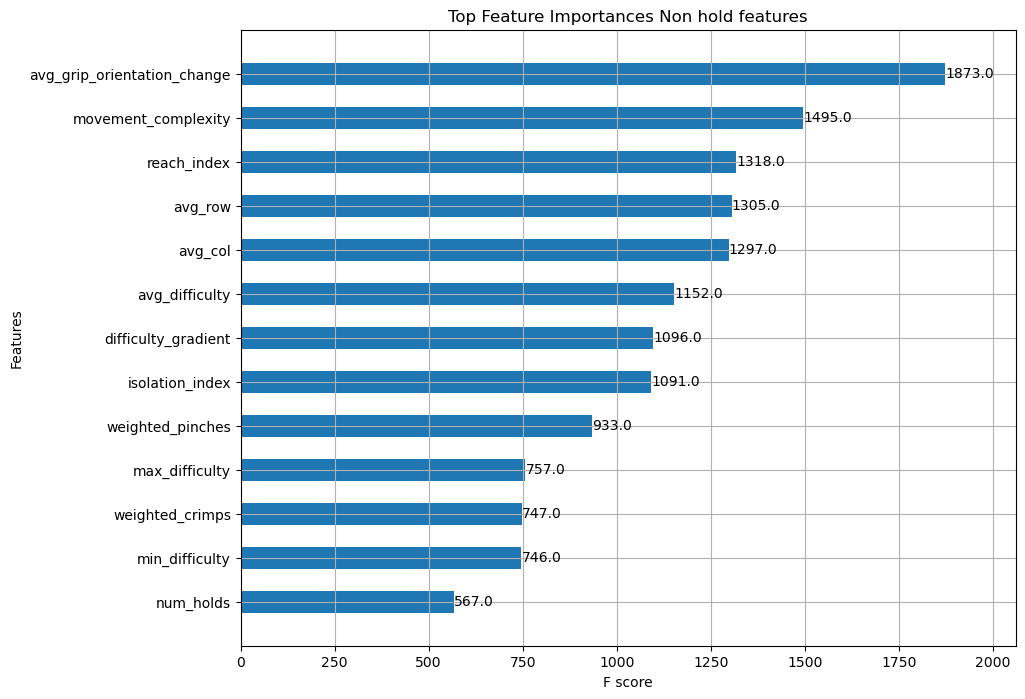

In [107]:
fig, ax = plt.subplots(figsize=(10, 8))
xgboost.plot_importance(xgb_smote_nh, max_num_features=13, height=0.5, ax=ax, importance_type='weight')
plt.title('Top Feature Importances Non hold features')
plt.show()